# **Trustworthy Machine Learning**
### Winter Semester 2022-2023
### Lecturer: Seong Joon Oh
### Tutor: Alexander Rubinstein
### **Exercise 1 -- OOD Generalisation**

---

**Group number**: 5

**Student names**:
* Balint Mucsanyi (6013671)
*
*

**Student emails**:
* mucsanyibalint99@gmail.com
*
*
---



#### **Submission deadline: 21/11/2022 at 23:59.**

In the first exercise, you will answer questions on the out-of-distribution (OOD) generalisation problems in machine learning.

#### **Policy for the first exercise**
This exercise is a **group exercise**. The same grade will be conferred to each member of the group based on the submission. Please report cases where any team member contributes significantly less than the other members of the same group. From the first exercise, the exercise grade will **count towards the final grade**.

####**Submission**
Follow the below four steps.

(1) Copy this colab file to your local gdrive;

`File > Save a copy in Drive`

(2) Work on the solution on your local copy;

(3) Pin the version for submission in history;

`Click on "All changes saved" or "Last saved at XX:XX AM/PM" next to the drop-down menus at the top > Select version to submit > Click on three vertical dots (vertical ellipsis) > Rename > Write "Submission" `

(4) Share your local colab with `stai.there@gmail.com` before the deadline.

`Click on "Share" at the top-right corner > Put stai.there@gmail.com in "Add people and groups" > Give the "Viewer" right and tick on "Notify people" > Click send.`

Note that we are able to see the edit history with time stamps, so please ensure that you stop working on your notebook before the deadline.

## **Out of distribution generalization**

## 1.1 Settings and real-world scenarios (5 points)

It is important to propose a plausible setting for studying ML methods. To make an argument that the proposed setting is indeed plausible, one would come up with an example real-world scenario. Let's try this.

**Description of the setting.**

- Development resources
  - Multiple image datasets $D_1, D_2, D_3, \dots, D_n$ with the same task (image classification with the possible set of class labels $Y$). Each dataset consists of IID samples from distributions $P_1, P_2, \dots, P_n$. Assume $P_i\neq P_j$ for all $i\neq j$. 
  - Every image sample $x$ is labelled with the image class $y\in Y$.
  - For each image $x$, you know which dataset it belongs to.
  - You have collected a few *unlabelled samples* $D_{n+1}$ from the deployment environment $P_{n+1}$.

- Deployment environment
  - The stream of inputs follow the distribution $P_{n+1}$. This distribution is different from those of the training datasets: $P_i \neq P_{n+1}$ for all $i\in\{1,...,n\}$.

---

**Q1**: How is this setting different from the "Domain Generalization" setting defined in Lecture 2? **(2 points)**

In domain generalization, we also have access to multiple domains during the dev stage ($D_1, \dots, D_n$) and we similarly assume access to both task and domain labels for all $n$ domains.

However, in domain generalization we do not have access to any samples $D_{n+1}$, be it labelled or unlabelled, during the development stage. The setting presented here is a mixture between *domain adaptation* (as we have access to some unlabelled samples from the deployment environment) and *domain generalization* (as we have access to both task and domain labels for samples from multiple domains).

---

**Q2**: Can you present an example real-world scenario for this setting? **(3 points)**

**Task**: Build a *self-driving car system* that aims to achieve SAE Level 3 using *conditional imitation learning*, an extension to *behavior cloning* (explained below). This means *automatic longitudinal and lateral control in specific use cases* in deployment, where the car can request the driver to resume control within a sufficient time margin.

**Development resources**: $n$ datasets for $n$ different driving conditions (cloudy weather, rainy weather, snow, icy roads, fog, different countries, different road types, etc. in various combinations)  with labelled samples $(X, Y, G)$ of the form
$$X = (I_t, v_t, \theta_t, c_t)$$
where
* $I_t$: image observation supplied by the car's frontal RGB camera at time step $t$,
* $v_t$: velocity of car at time step $t$,
* $\theta_t$: angle of front wheels of car at time step $t$,
* $c_t$: condition at time step $t$, which is the GPS location of the next waypoint to reach,

$$Y = a_t$$
where
* $a_t$: appropriate action to take at time step $t$ (steering angle and acceleration),
and

$$G \in \{1, \dots, n\}$$
is the *ID of the dataset* the sample is from.

The datasets are collected by a *human expert driver* whose actions are saved together with the state $X$ at all time steps.

Moreover, a few *unlabelled samples* are also available from the deployment domain, which is a different driving condition than the $n$ previous ones.

A team of *10 expert ML engineers* with expert knowledge is available for the development of the model. This means that they are aware of current state-of-the-art inductive biases and model architectures in self-driving.

*10 Google TPU v4 nodes* and *10 MacBook Pros* can be used anytime throughout the project, with continuous internet access.

**Deployment environment**: A new, previously unseen driving condition (e.g. new country with new street signs compared to the previous $n$ domains). Some samples are needed for the model to adapt to slightly different rules of driving, thus the requirement of some unlabelled samples from this domain during development is justified. A *safety driver* is needed at all times to be able to resume control once requested.

## 1.2 Identifying the exact setting in research work (4 + 4 = 8 points)

Read the paper "[Learning from Failure: Training Debiased Classifier from Biased Classifier](https://proceedings.neurips.cc/paper/2020/file/eddc3427c5d77843c2253f1e799fe933-Paper.pdf)" published at NeurIPS 2020. 

---

**Q1**: Identify an _exhaustive_ list of development resources used for training and selecting the model in the method `Learning from Failure`. This includes training/validation datasets and corresponding labels as well as any type of human guidance or wisdom. **(4 points)**

* General (both model selection and training):
    * **No** labelling on spuriously correlated attributes
    * **No** assumption about particular bias type
    * Various datasets for training, evaluation and model selection
        * Colored MNIST
        * Corrupted CIFAR-10
        * CelebA
        * imSitu
        * Note: these are direct resources as they were all already proposed in earlier works. BAR is *not* a direct resource, as it is constructed by the authors from the imSitu dataset
    * Various neural network architectures
        * MLP
        * ResNet-20
        * ResNet-18
    * Financial support
        * IITP grant
* Selecting the model:
    * Assumption on bias we want to remove: it is the first cue that is learned by the intentionally biased model
    * Research expertise of all authors
        * Previous uncited works that helped build up research expertise and intuition of all authors
    * Previous cited works that influenced research directions of authors (e.g. training dynamics of deep neural networks, cross-bias generalization in different or same settings, GCE, etc.)
    * In particular, various other debiasing algorithms mentioned
        * HEX
        * REPAIR
        * Group DRO
        * ReBias
        * RUBi
* Training the model:
    * Computational resources and storage used by the authors (no list provided), internet access

---

**Q2**: As we have seen in the lecture, feature selection is an impossible problem when the needed cue for the task is unknown to the learner. How does the `Learning from Failure` method provide this necessary information on the needed cue to the learner? Which assumptions on the task-relevant cue are made and how are they exploited by the given method? **(4 points)**

As per usual in supervised learning, we assume labelled samples $(X, Y)$. The needed cue is, of course, not explicitly supplied to the method. In this work, it is not even supplied implicitly in the form of bias labels. However, this information is *implicitly encoded* in the additional assumption used by the algorithm that **the bias we want to remove is the first cue that is learned by the intentionally biased model**.

This is exploited by the method by using the GCE loss function for the intentionally biased model to emphasize the easy samples learned at the beginning of the training procedure throughout training. Concretely, using GCE results in a large gradient update for samples that the model already predicts correctly, and a very small update for incorrect predictions.  In short, the intentionally biased model will keep exploiting the "easy" cues throughout training.

By using the loss values of the intentionally biased model in the weights for the CE loss used by the final model<sup>1</sup>, it can thus focus on "harder" samples more (that are less biased, according to the assumption), thereby we get a model that focuses on the task cue more in the end.

This additional assumption is not always satisfied in real-world applications. However, when it is, the algorithm is a very powerful method to debias networks.

<sup>1</sup>Concretely, the weight of sample $x$ in the CE loss for the final model is
$$W(x) = \frac{\text{CE}(f_B(x), y)}{\text{CE}(f_B(x), y) + \text{CE}(f_D(x), y)}.$$


## 1.3 Equivalence of losses (5 + 5 = 10 points)

Again, the NeurIPS 2020 paper "[Learning from Failure: Training Debiased Classifier from Biased Classifier](https://proceedings.neurips.cc/paper/2020/file/eddc3427c5d77843c2253f1e799fe933-Paper.pdf)" defines the Generalized Cross Entropy (GCE) loss as follows:

\begin{equation*}
\text{GCE}(p(x; \theta), y, q) = \dfrac{1 - p_y(x;\theta)^q}{q}
\end{equation*}

where $p(x)\in[0,1]^{|Y|}$ is the prediction vector for input $x$ with probabilities $p_y$ for each class $y\in Y$ and $q>0$ is a scalar.

Given that the Cross Entropy (CE) loss is

\begin{equation*}
\text{CE}(p(x; \theta), y) = -\log p_y(x;\theta)
\end{equation*}

Prove the following:

- (5 points): For all $p$ and $y$, $\text{GCE}(p,y,q) \rightarrow \text{CE}(p,y)$ as $q\downarrow 0$.

To show this, we make use of the *L'Hospital's rule*. Consider any $p$ and $y \in Y$. Then
$$
\begin{align}
\lim_{q \rightarrow 0}\text{GCE}(p, y, q) &= \lim_{q \rightarrow 0} \frac{1 - p_y^q}{q} \\
&\overset{L'Hospital}{=} \lim_{q \rightarrow 0} \frac{\frac{\partial}{\partial q}\left(1 - p_y^q\right)}{\frac{\partial}{\partial q}q} \\
&= \lim_{q \rightarrow 0} \frac{-p_y^q\log(p_y)}{1} \\
&= -\left(\lim_{q \rightarrow 0} p_y^q\right)\log(p_y) \\
&= -\log(p_y) \\
&= \text{CE}(p, y).
\end{align}
$$
where $\log(\cdot)$ denotes the natural logarithm. As the limit indeed exists, the use of L'Hospital's rule was justified.

- (5 points): For all $p$, $y$, and $q>0$,
$$\dfrac{\partial\, \text{GCE}(p(x; \theta), y, q)}{\partial\, \theta} = p^q_y\,\dfrac{\partial\, \text{CE}(p(x; \theta), y)}{\partial\, \theta}.$$

$$
\begin{align}
\frac{\partial \text{GCE}(p, y, q)}{\partial \theta} &= \frac{\partial}{\partial \theta} \left(\frac{1 - p_y^q}{q}\right) \\
&= \frac{\partial}{\partial p_y} \left(\frac{1 - p_y^q}{q}\right) \frac{\partial}{\partial \theta} p_y \\
&= -\frac{qp_y^{q-1}}{q} \frac{\partial}{\partial \theta} p_y \\
&= -p_y^{q-1}p_y\frac{\partial}{\partial \theta}\log(p_y) \\
&= p_y^q \left(\frac{\partial}{\partial \theta} - \log(p_y)\right) \\
&= p_y^q \frac{\partial \text{CE}(p, y)}{\partial \theta}
\end{align}
$$
where we used the shorthand $p := p(x; \theta)$ for clarity.

## 1.4 Intro to dSprites dataset (2 + 3 = 5 points)

Note: for this and the following exercises we suggest using Google Colab environment with a GPU. If you exhausted your GPU-time limits you can register a new free Google account and continue working from it.

We will use [dSprites dataset](https://github.com/deepmind/dsprites-dataset) for all the experiments in this homework.
It contains images with different cues: color, shape, scale, orientation, horizontal and vertical positions (posX and posY).
  
Numbers of different values for each cue are the following:

- color: 3 (red, blue, green)
- shape: 3 (square, ellipse, heart)
- scale: 6 (from smallest to biggest)
- orientation: 40 (different angles)
- posX, posY: 32 (different coordinates)

Throughout this homework we will label images according to these values by uniformly distributing them into "NUM_CLASSES" classes.

In [1]:
!pip install -q torchmetrics
!pip install -q gdown

     |████████████████████████████████| 529 kB 7.5 MB/s 


In [2]:
!git clone --branch main https://github.com/AlexanderRubinstein/UT-TML.git &> /dev/null

In [44]:
import os
import sys
import numpy as np
import random
import torch
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
import copy
from IPython.display import clear_output
import gdown
from typing import (
    Dict,
    List,
    Tuple,
    Callable,
    Union,
    Any
)


# local modules
ROOT = "/content"
REPO_NAME = "UT-TML"
REPO_PATH = os.path.join(ROOT, REPO_NAME)
SRC_PATH = os.path.join(REPO_PATH, "src") 
sys.path.insert(0, SRC_PATH)
import utils  
import models
import datasets
from datasets import (
    DSPRITES_NPZ_PATH, 
    NUM_CLASSES,
    GROUND_TRUTH_CUE,
    EASY_TO_BIAS_CUE,
    IS_DSPRITES_COLORED,
    N_COLORS,
    TEST_DATASET_SIZE, 
    TRAIN_DATASET_SIZE,
    DEFAULT_DSPRITES_HOLDER_ARGS
)
import train
import experiments
sys.path = sys.path[1:]


DSPRITES_NPZ_URL = (
    "https://github.com/deepmind/dsprites-dataset/raw/master/"
    "dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz"
)
ADVERSARIALLY_ATTACKED_CUE = "shape"

DEFAULT_START_LR = 0.01


OFF_DIAG_PROPORTION = 0.01
INVERTED_OFF_DIAG_PROPORTION = (
    int(1 / OFF_DIAG_PROPORTION) if OFF_DIAG_PROPORTION != 0 else 1
)
RANDOM_SEED = 42


# DANN params
ALPHA = 10
BETA = 0.75
GAMMA = 10
D_LAMBDA = 1


# adversarial attack params
FGSM_EPS = 0.1
FGSM_ALPHA = 0.5 


CACHE_PATH = "/tmp/ood_cache"


HELPER_FILES_FOLDER_URL = (
    "https://drive.google.com/drive/folders/"
    "1wDHu0gktM_39NNCB-ru7ewVg-9MVfq-z?usp=sharing"
)
HELPER_FILES_PATH = "./1_ood"


utils.apply_random_seed(RANDOM_SEED)
%matplotlib inline

Let's download dSprites dataset and helper files:

In [4]:
if not os.path.exists(DSPRITES_NPZ_PATH):
    os.system(f"wget {DSPRITES_NPZ_URL} -O {DSPRITES_NPZ_PATH}")
if not os.path.exists(HELPER_FILES_PATH):
    gdown.download_folder(
        HELPER_FILES_FOLDER_URL, 
        output=HELPER_FILES_PATH, 
        quiet=True
    )

Very often in this homework we will use functions that will have names like "prepare_something_maker". They will be used to create factories (functions that make objects) which will be named like "make_something". 

These factories will be used to create almost all objects for our experiemnts (dataloaders, criterions, models, metrics, optimizers, schedulers, etc). Created objects will be pickled and saved in "CACHE_PATH" to just read them from the disk next time we want to create them again.

Let's create a dataloader (making a corresponding factory by [datasets.prepare_default_dsprites_dataloaders_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/datasets.py#L824-L963)) that gives multiple labels. Each label will correspond to each cue:



In [5]:
test_multilabel_dataloaders \
    = datasets.prepare_default_dsprites_dataloaders_maker(
        is_multilabel=True,
        split="test",
        dataset_size=TEST_DATASET_SIZE
    )(None)

Saved cached dsprites_holder into /tmp/ood_cache/dsprites_holder_693439d4be339e36364e.pkl
Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Saved cached default_dsprites_dataloaders into /tmp/ood_cache/default_dsprites_dataloaders_6049af145a21f36ab291.pkl


We can visualize first batch of this dataloader using [utils.show_dataloader_first_batch](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/utils.py#L439-L470):

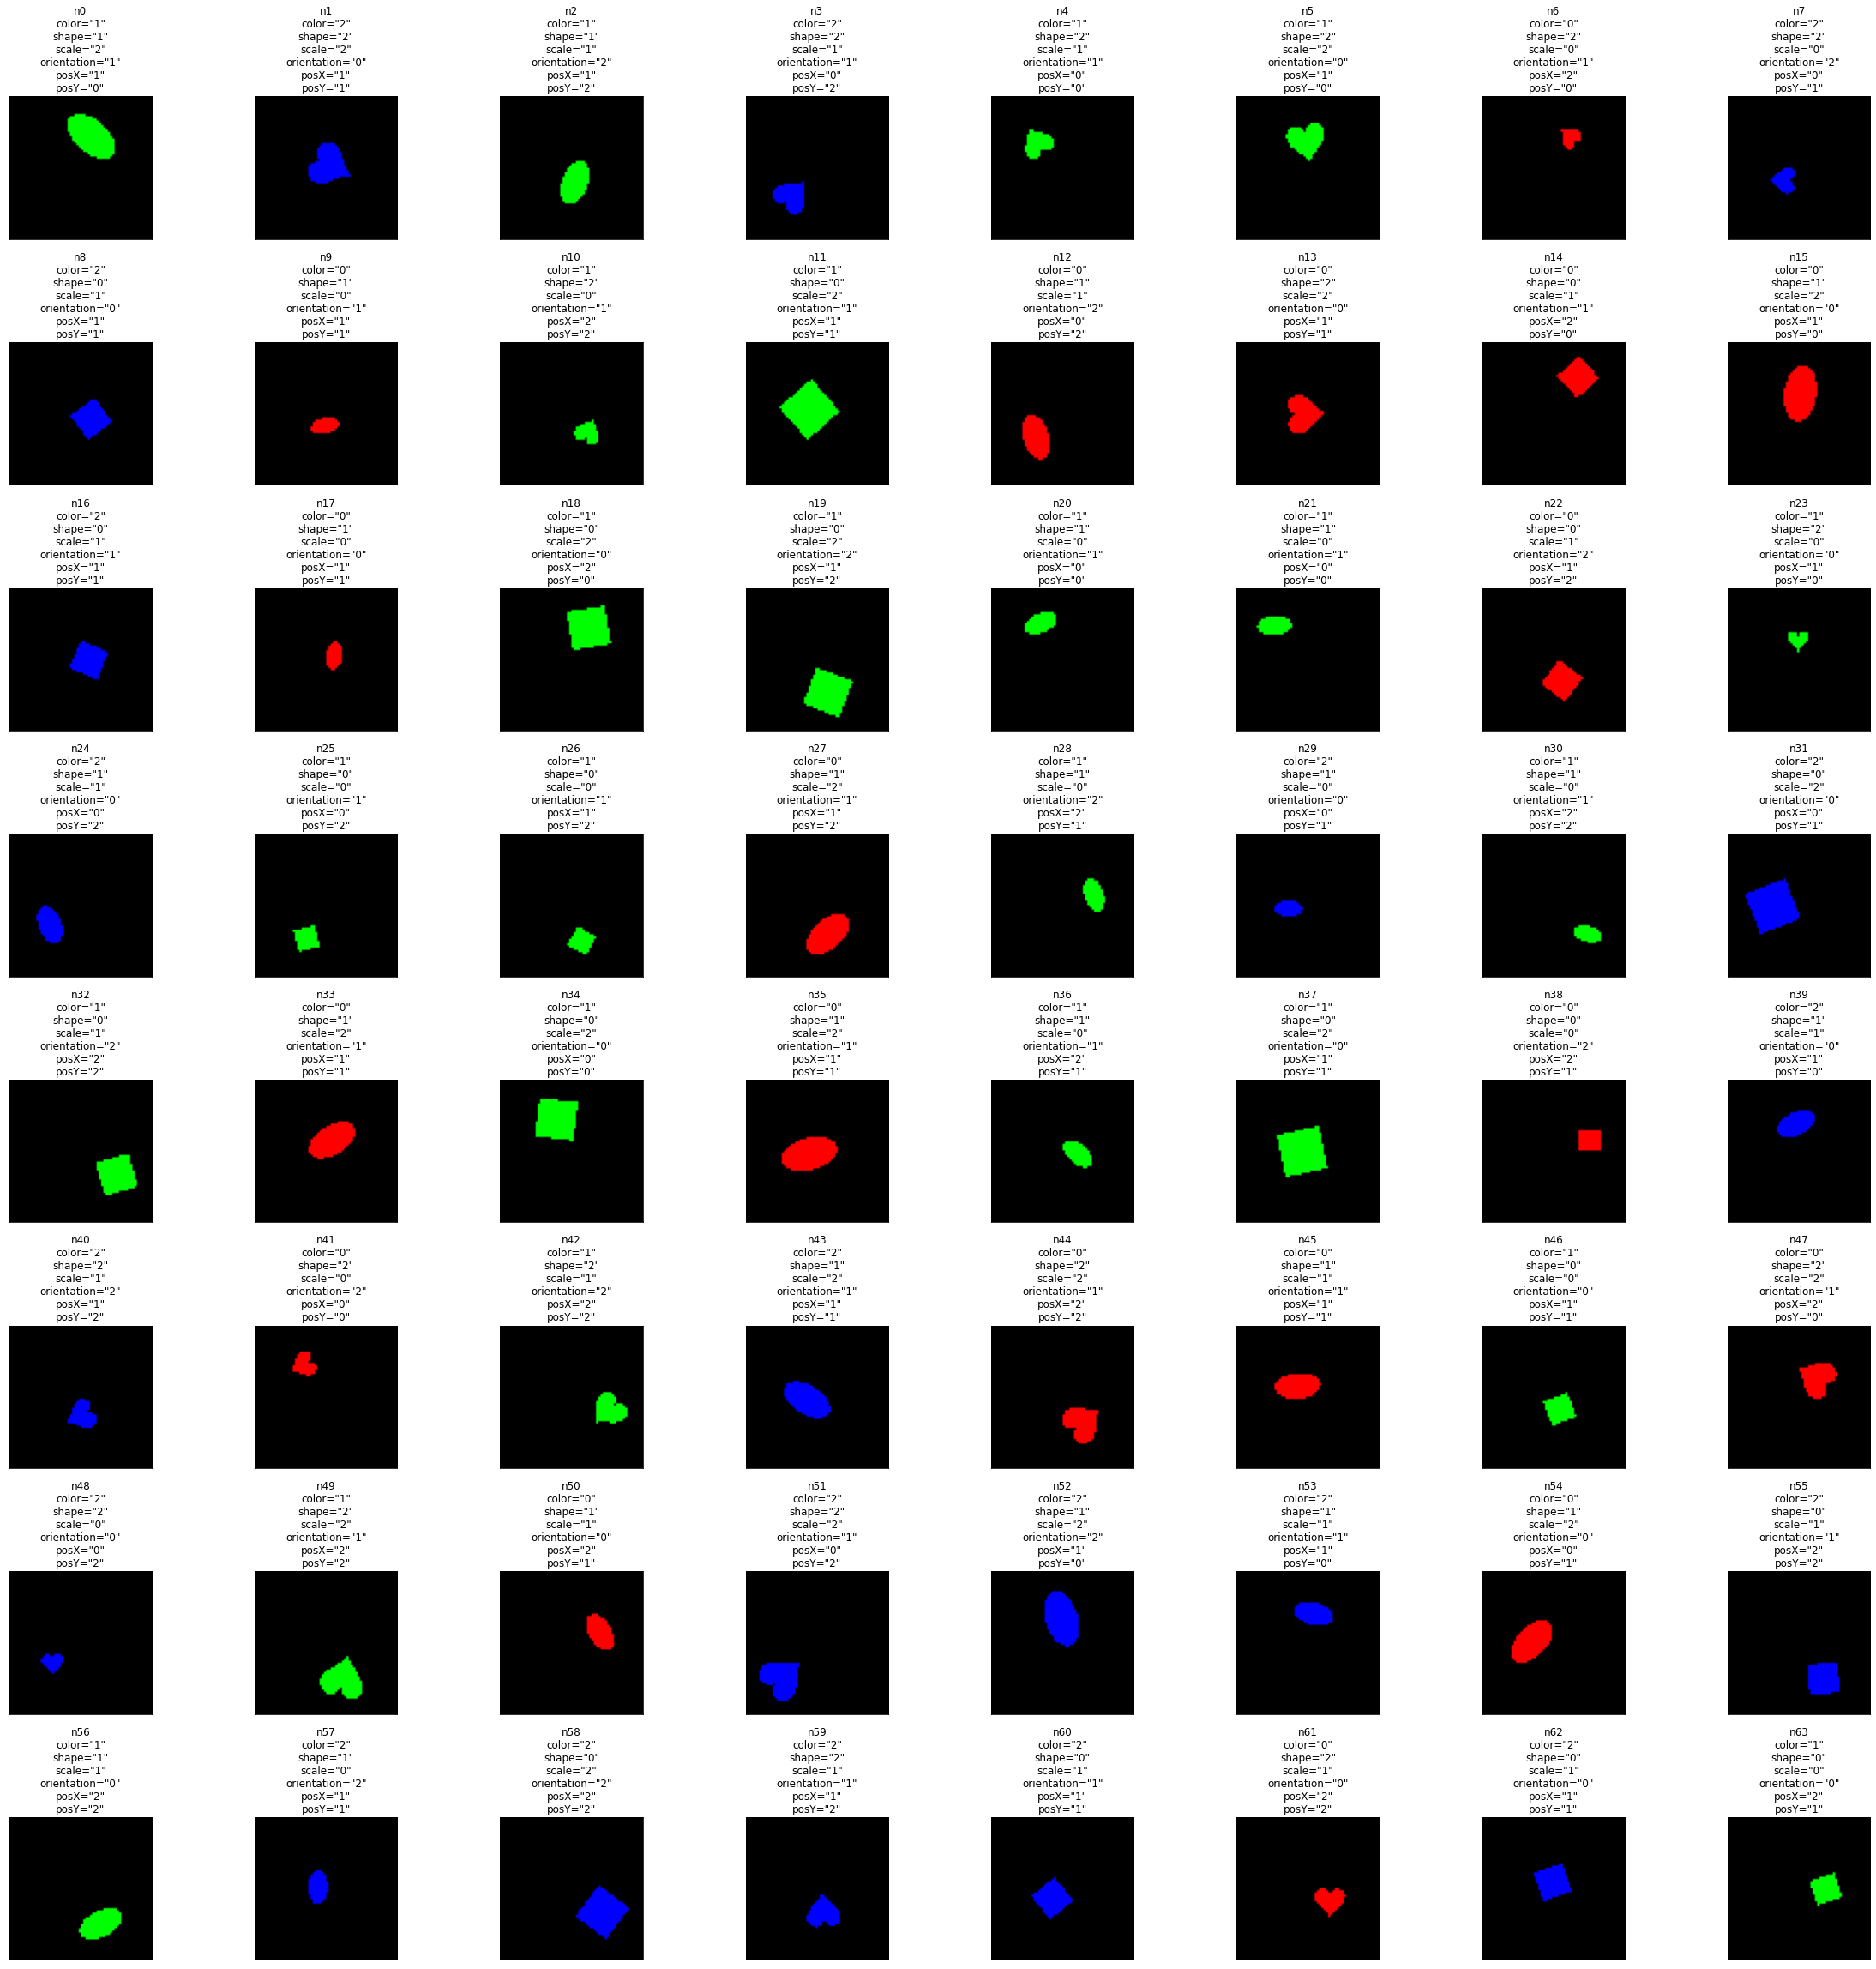

In [6]:
test_multilabel_dataloader = test_multilabel_dataloaders["all_cues"]
utils.show_dataloader_first_batch(
    test_multilabel_dataloader, 
    test_multilabel_dataloader.cue_names
)

Let's create a model (using [models.prepare_resnet18_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/models.py#L98-L111)) and evaluate it (using [train.eval_model_on_test](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L406-L448)) by computing accuracy (created by [train.make_accuracy](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L451-L452)) on the above dataloader without any training (it should give random predictions). 

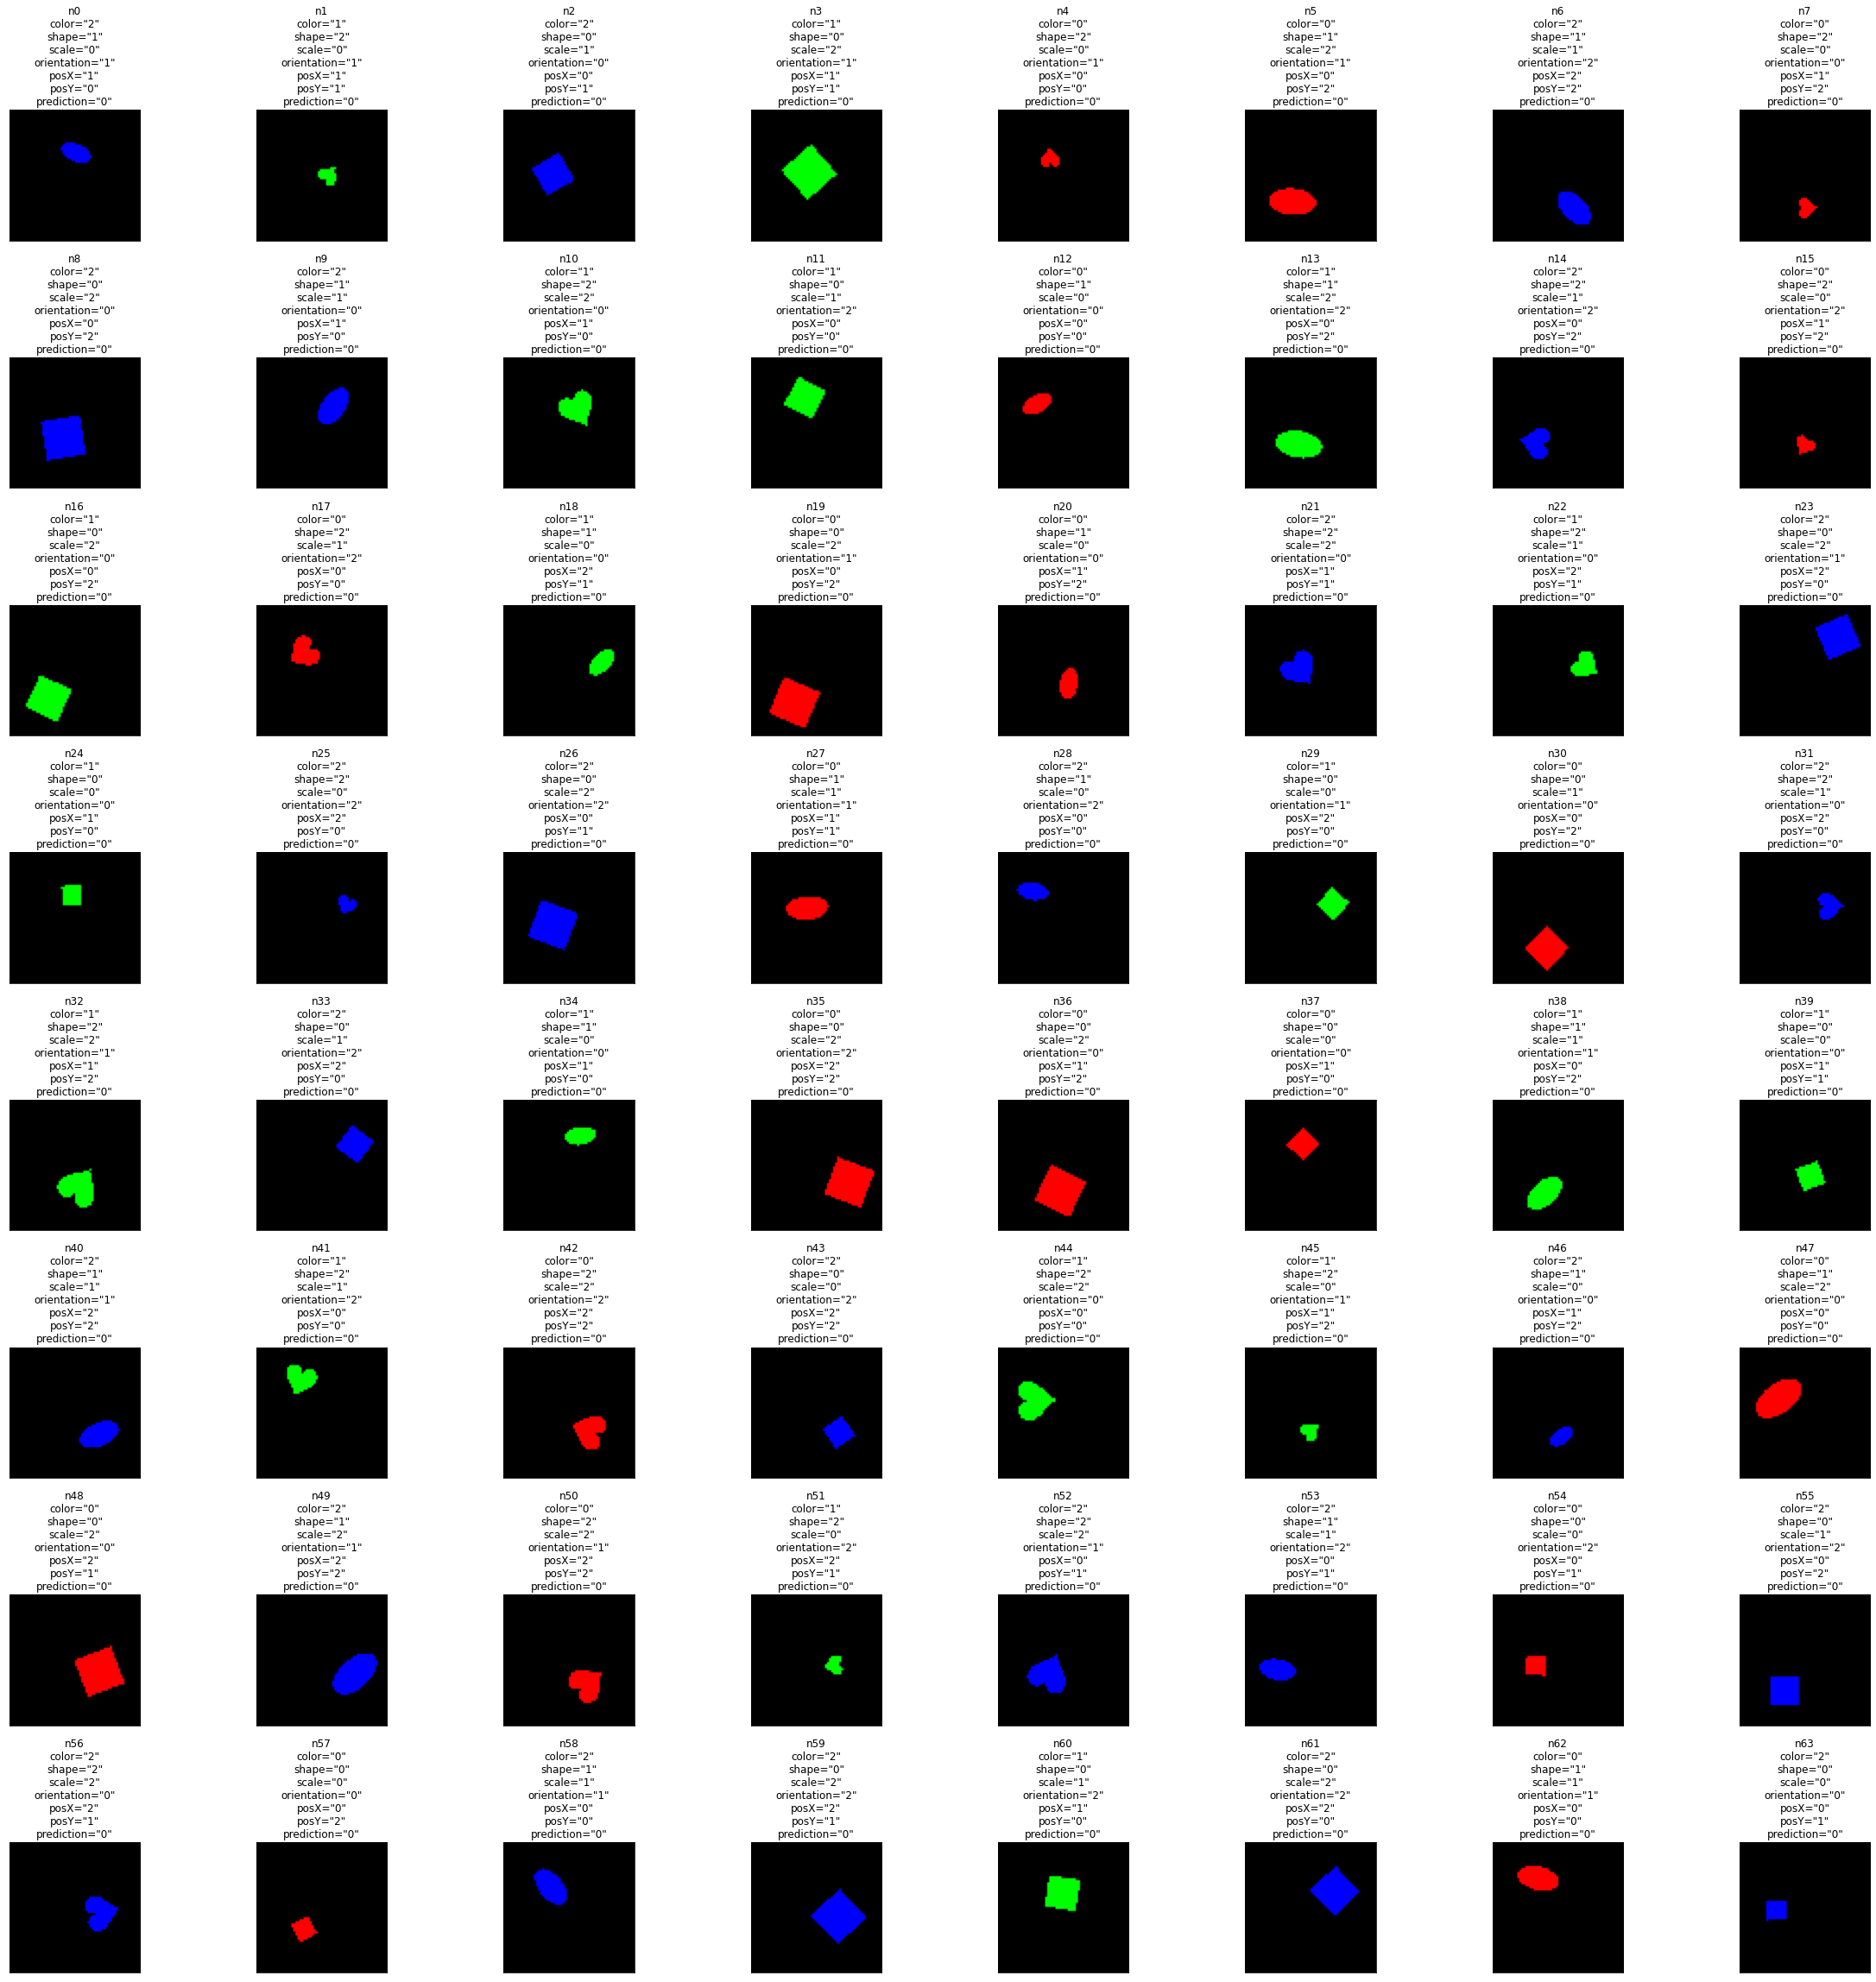

                            
Test on all_cues Accuracy for color: 0.334
Test on all_cues Accuracy for shape: 0.336
Test on all_cues Accuracy for scale: 0.335
Test on all_cues Accuracy for orientation: 0.351
Test on all_cues Accuracy for posX: 0.35
Test on all_cues Accuracy for posY: 0.346


In [7]:
random_model = models.prepare_resnet18_maker(
    pretrained=False, 
    n_channels=N_COLORS, 
    n_classes=NUM_CLASSES
)()

train.eval_model_on_test(
    random_model, 
    test_multilabel_dataloaders, 
    make_metric=train.make_accuracy
)

Let's load from disk and evaluate some pre-made models on this dataloader.

In [8]:
# load pre-made models 
model_A_path = os.path.join(HELPER_FILES_PATH, "model_A")
model_B_path = os.path.join(HELPER_FILES_PATH, "model_B")

if IS_DSPRITES_COLORED:
    model_A_path += "_colored"
    model_B_path += "_colored"

model_A = utils.default_load_func(model_A_path)
model_B = utils.default_load_func(model_B_path)

## Evaluate model_A and model_B as in the example above and tell which cues they are trained to predict (2 points).

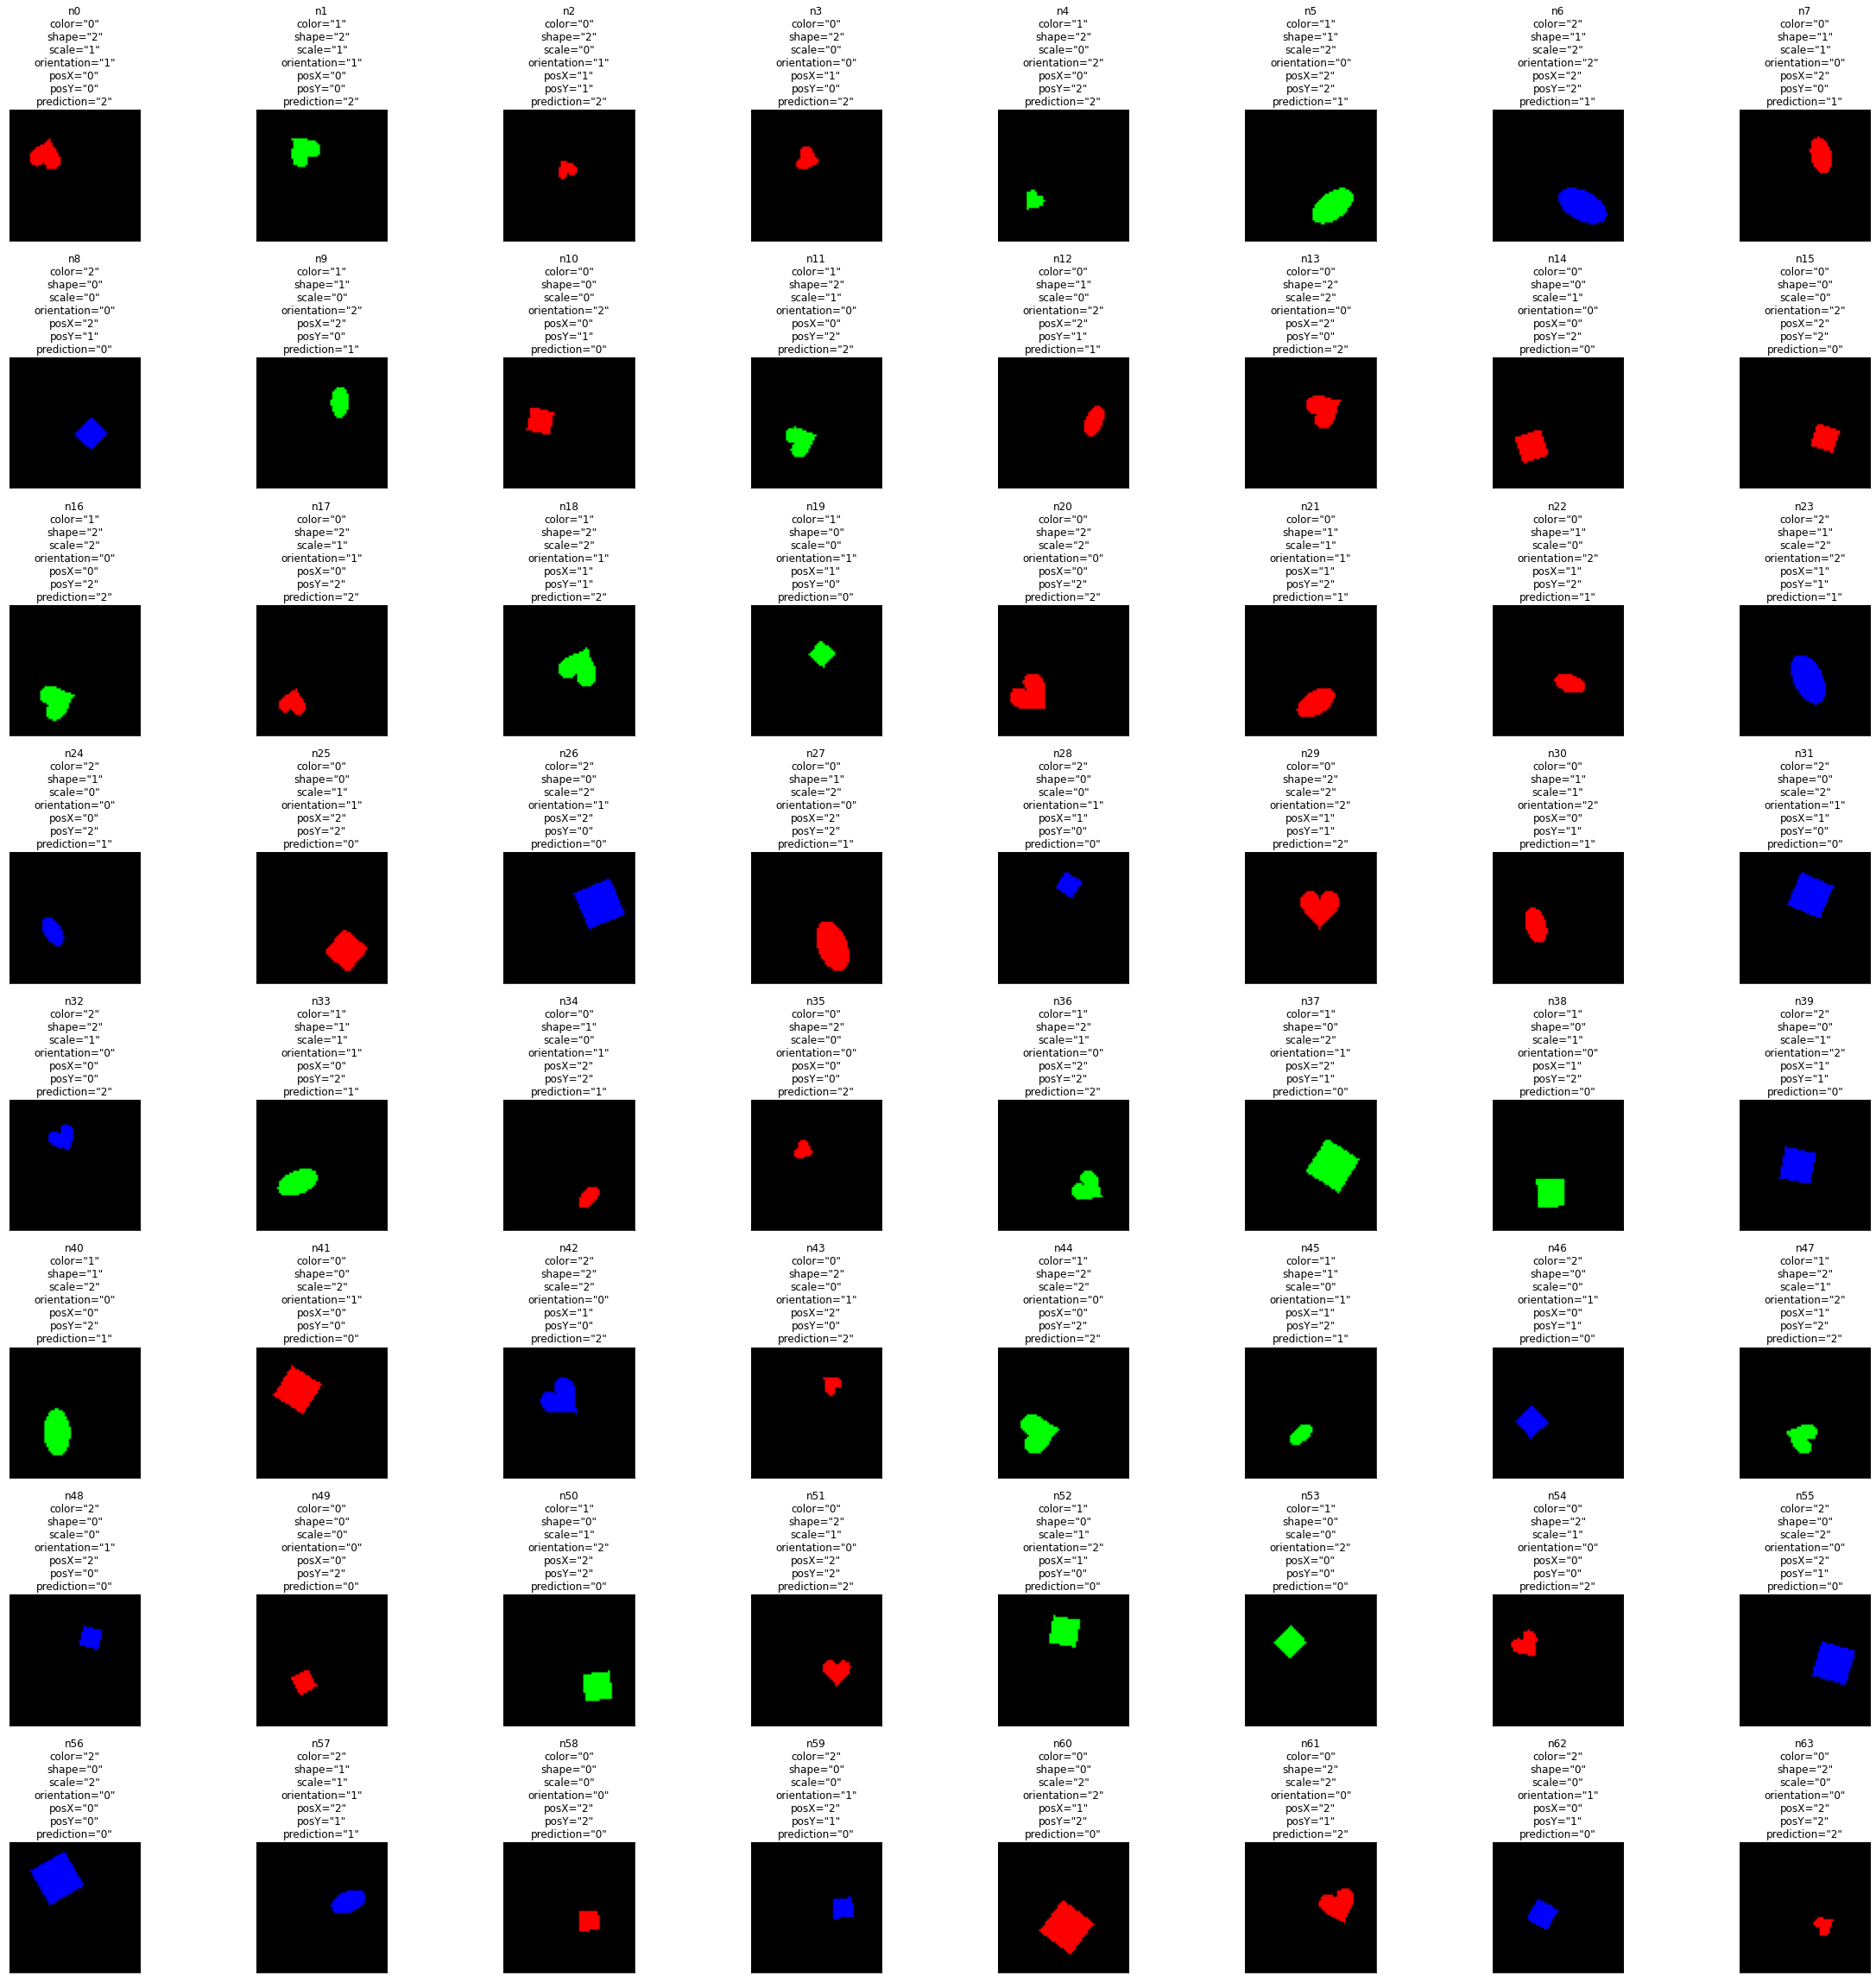

                            
Test on all_cues Accuracy for color: 0.335
Test on all_cues Accuracy for shape: 0.998
Test on all_cues Accuracy for scale: 0.338
Test on all_cues Accuracy for orientation: 0.336
Test on all_cues Accuracy for posX: 0.328
Test on all_cues Accuracy for posY: 0.328


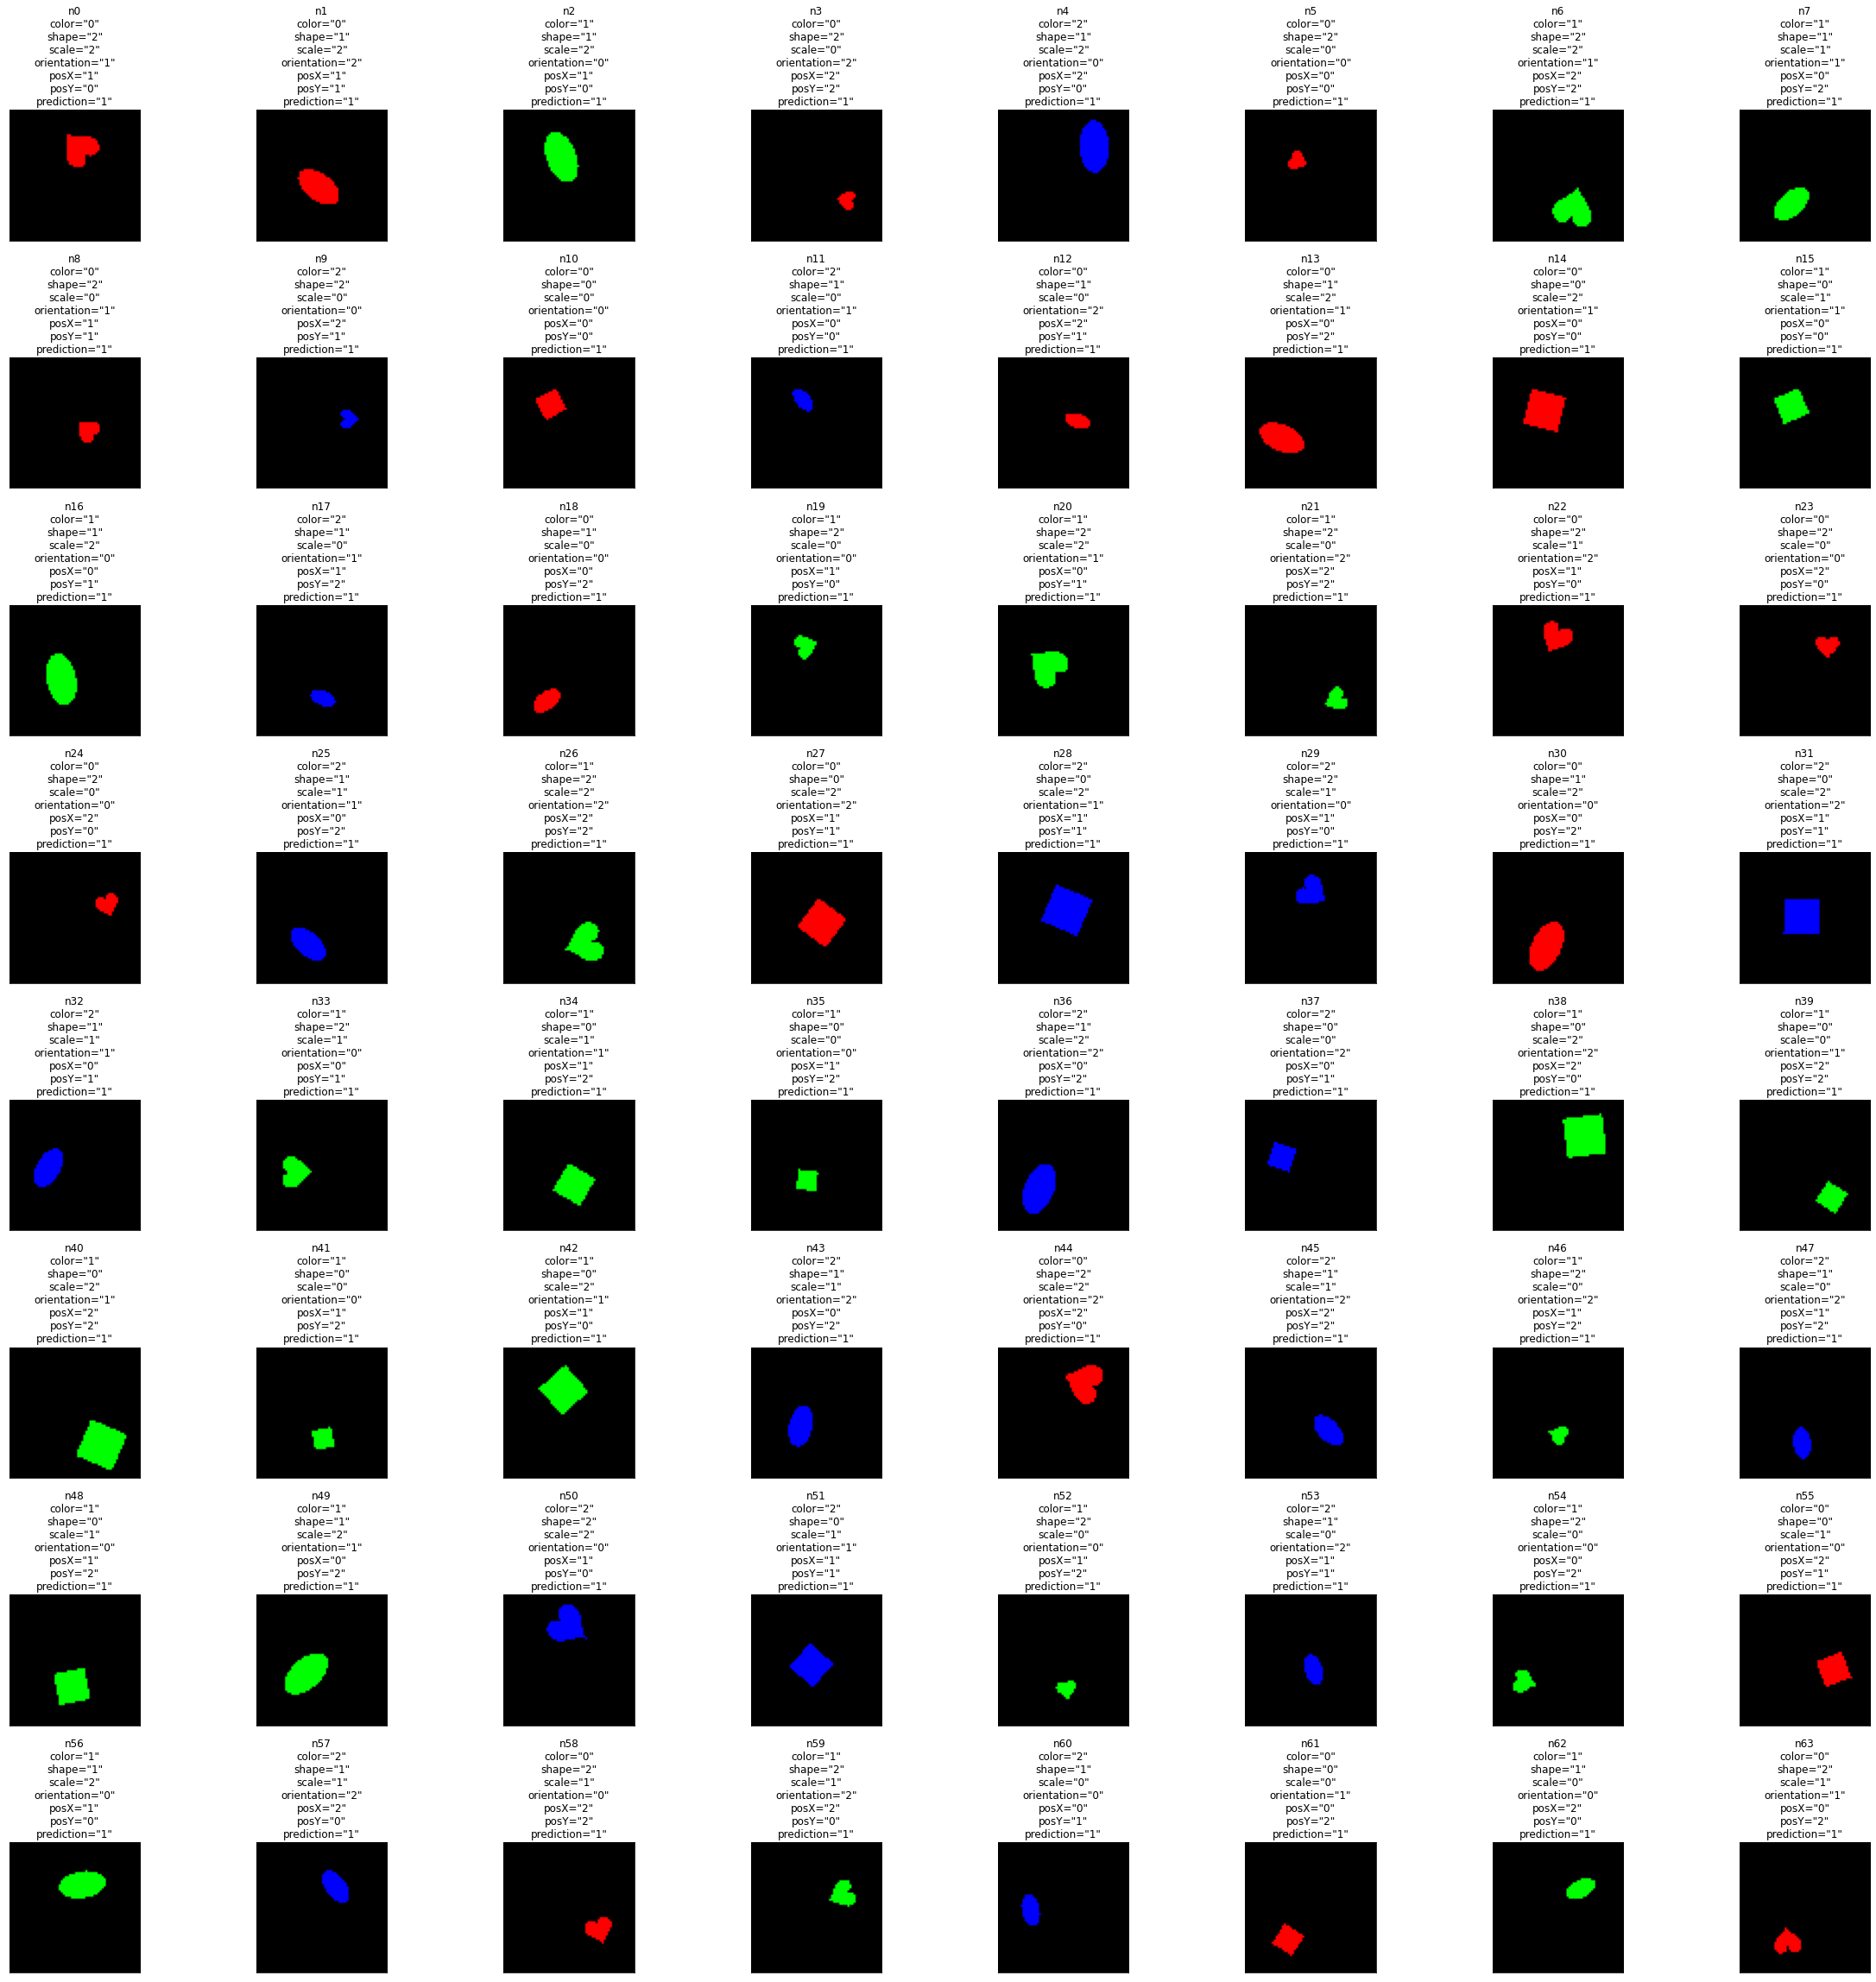

                            
Test on all_cues Accuracy for color: 0.33
Test on all_cues Accuracy for shape: 0.33
Test on all_cues Accuracy for scale: 0.33
Test on all_cues Accuracy for orientation: 0.32
Test on all_cues Accuracy for posX: 0.345
Test on all_cues Accuracy for posY: 0.341


In [9]:
# Check to which cue which model is trained (maybe random model)

######### ATTENTION PLEASE
train.eval_model_on_test(
    model_A, 
    test_multilabel_dataloaders, 
    make_metric=train.make_accuracy
)

train.eval_model_on_test(
    model_B, 
    test_multilabel_dataloaders, 
    make_metric=train.make_accuracy
)
######### THANK YOU FOR YOUR ATTENTION

We can see that model A learned the shape cue very well: it reaches nearly perfect accuracy on it. However, the accuracies on other cues correspond to just random guessing.

Model B on the other hand did not learn any cue: its outputs simply correspond to random guessing.

Okay, we understood how to evaluate models, but how to train them? For that we will use function [train.train_eval_loop](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L235-L403).

To train and eval a model we will need to provide train and validation dataloaders accompanied by
the following factories:

- make_model
- make_metrics
- make_criterion
- make_optimizer
- make_scheduler

as well as function "do_train_func" which defines how to update model weights (you can see examples of these functions in the next task).

With these building blocks we can describe any train/eval procedure we need.

### Train a model (3 points)

In [10]:
one_cue_train_dataloader = datasets.prepare_default_dsprites_dataloaders_maker(
    one_dataloader_to_select=GROUND_TRUTH_CUE
)(None)

model_to_train = models.prepare_resnet18_maker()()

Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Saved cached default_dsprites_dataloaders into /tmp/ood_cache/default_dsprites_dataloaders_939d09271c96f8cf7475.pkl


Train the "model_to_train" on the "one_cue_train_dataloader" and validate on the "test_multilabel_dataloaders" so that it has 90%+ validation accuracy.

Use the following functions from the UT-TML repo:
- [train.train_eval_loop](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L235-L403)
- [train.make_accuracy](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L451-L452)
- [train.make_ce_criterion](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L455-L456)
- [train.prepare_sgd_optimizer_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L459-L468)
- [train.prepare_exp_scheduler_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L490-L495)
- [train.do_default_train_func](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L498-L563)

Epoch 50/50 train mean stats:
    loss: 0.011176008933458846
    Accuracy: 0.997


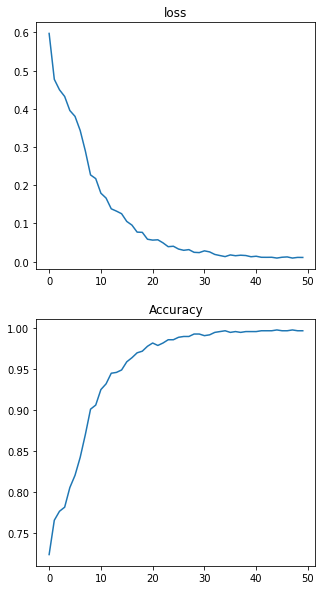

                                    
Epoch 50/50 val all_cues mean stats:
    Accuracy for color: 0.334
    Accuracy for shape: 0.331
    Accuracy for scale: 0.991
    Accuracy for orientation: 0.338
    Accuracy for posX: 0.33
    Accuracy for posY: 0.338


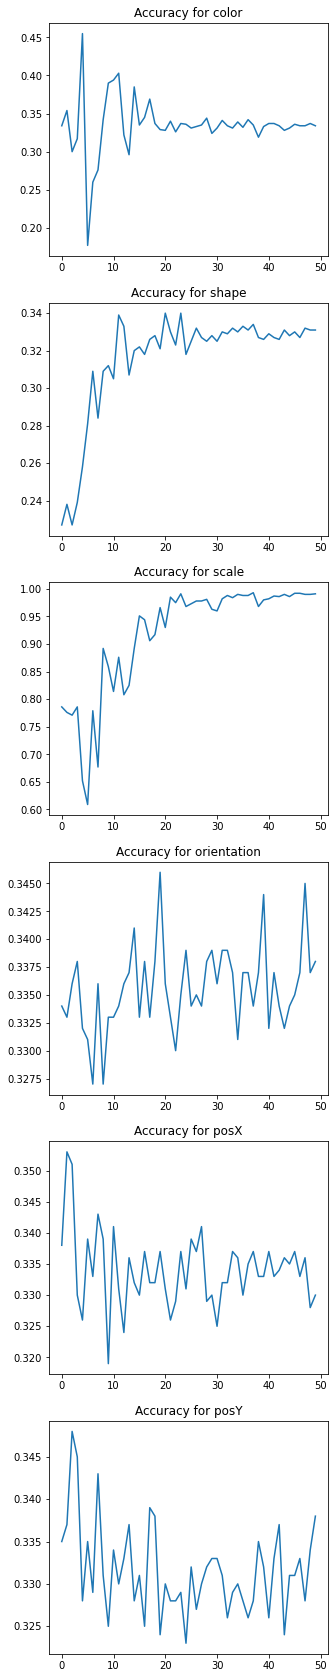

In [11]:
######### ATTENTION PLEASE
N_EPOCHS = 50
START_LR = DEFAULT_START_LR
MOMENTUM = 0.9
GAMMA = 0.9

train.train_eval_loop(
    model=model_to_train,
    train_dataloader=one_cue_train_dataloader,
    val_dataloaders=test_multilabel_dataloaders,
    n_epochs=N_EPOCHS,
    make_metric=train.make_accuracy,
    make_criterion=train.make_ce_criterion,
    make_optimizer=train.prepare_sgd_optimizer_maker(
        start_lr=START_LR,
        momentum=MOMENTUM
    ),
    make_scheduler=train.prepare_exp_scheduler_maker(
        gamma=GAMMA
    ),
    do_train_func=train.do_default_train_func
)
######### THANK YOU FOR YOUR ATTENTION

To avoid calling above function every time, in the next exercises we will use function [experiments.generic_experiment](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/experiments.py#L13-L86). It will train and eval model on train/val dataloaders and then test it on a test dataloader. It will use factories to create all objects.

## 1.5 De-biasing task (10 + 5 + 5 + 10 + 15 [+ 10] = 45 [55] points)

For the de-biasing task we will focus on two cues. One cue will be called "ground_truth_cue" (defined by the "GROUND_TRUTH_CUE") and the second cue will be called "easy_to_bias_cue" (defined by the "EASY_TO_BIAS_CUE"). 

Each sample will be assigned with two labels: "ground_truth_label" according to the "ground_truth_cue" and "easy_to_bias_label" according to the "easy_to_bias_cue".

Let's introduce the concept of diagonal and off-diagonal samples:

![](https://drive.google.com/uc?export=view&id=1tlRWcMEY0TWG4E9eb161GuX3qJvzI4QS "Diagonal and off-diagonal samples.")

As we can see from the image above, when "ground_truth_label" equals "easy_to_bias_label" for some sample, this sample is called diagonal, otherwise it is called off-diagonal.



Most of the samples in the train dataloader will be diagonal in this exercise. 

Our goal is to train a model which predicts "ground_truth_label" with higher accuracy than "easy_to_bias_label". The main difficulty is that it is not a necessary condition for correctly predicting train labels.

Let's see what happens if we just train a model on a purely diagonal train dataloader (i.e. all samples are diagonal in this dataloader).

For that reason we will use a function "de_biasing_exp" below. It uses [datasets.prepare_de_biasing_task_dataloader_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/datasets.py#L966-L1123) to prepare factories for dataloaders. If you are interested, there is a comment about validation and test datasets for this experiment in the "Note" section of the [report task](https://colab.research.google.com/drive/1rBbUwaaugOOCEt5eOQnSe9q4INdU5SoN#scrollTo=WLqrYkopwUDh&line=16&uniqifier=1) description.

In [12]:
def de_biasing_exp(
    n_epochs,
    make_train_dataloader=datasets.prepare_de_biasing_task_dataloader_maker(),  # Perfectly diagonal data
    make_val_dataloaders=datasets.prepare_de_biasing_task_dataloader_maker(
        split="test",
        dataset_size=TEST_DATASET_SIZE
    ),  # (Perfectly diagonal data, Uncorrelated target cue data)
    make_test_dataloaders=datasets.prepare_default_dsprites_dataloaders_maker(
        is_multilabel=True,
        split="test",
        dataset_size=TEST_DATASET_SIZE
    ),  # (Perfectly diagonal data, Uncorrelated multilabel data)
    make_model=models.prepare_resnet18_maker(),
    make_criterion=train.make_ce_criterion,
    make_optimizer=train.prepare_sgd_optimizer_maker(DEFAULT_START_LR),
    make_scheduler=train.prepare_exp_scheduler_maker(),
    make_metric=train.make_accuracy,
    do_train_func=train.do_default_train_func,
    random_seed=RANDOM_SEED,
    stop_after_epoch=None
):
    experiments.generic_experiment(
        n_epochs=n_epochs,
        make_train_dataloader=make_train_dataloader,
        make_val_dataloaders=make_val_dataloaders,
        make_test_dataloaders=make_test_dataloaders,
        make_model=make_model,
        make_metric=make_metric,
        make_criterion=make_criterion, 
        make_optimizer=make_optimizer,
        make_scheduler=make_scheduler,
        do_train_func=do_train_func,
        random_seed=random_seed,
        stop_after_epoch=stop_after_epoch
    )

Let's run default de-biasing exp:

Epoch 10/10 train mean stats:
    loss: 2.5305258039649248e-05
    Accuracy: 1.0


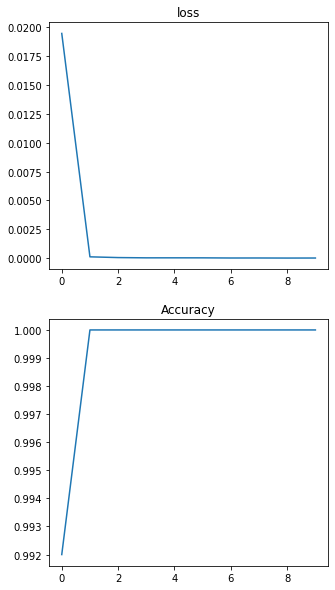

                                
Epoch 10/10 val diag mean stats:
    Accuracy: 1.0


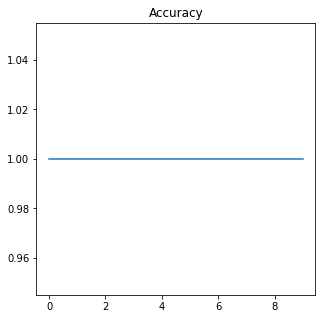

                                 
Epoch 10/10 val scale mean stats:
    Accuracy: 0.358


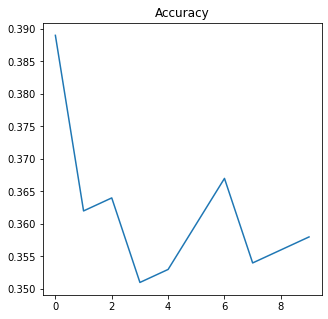

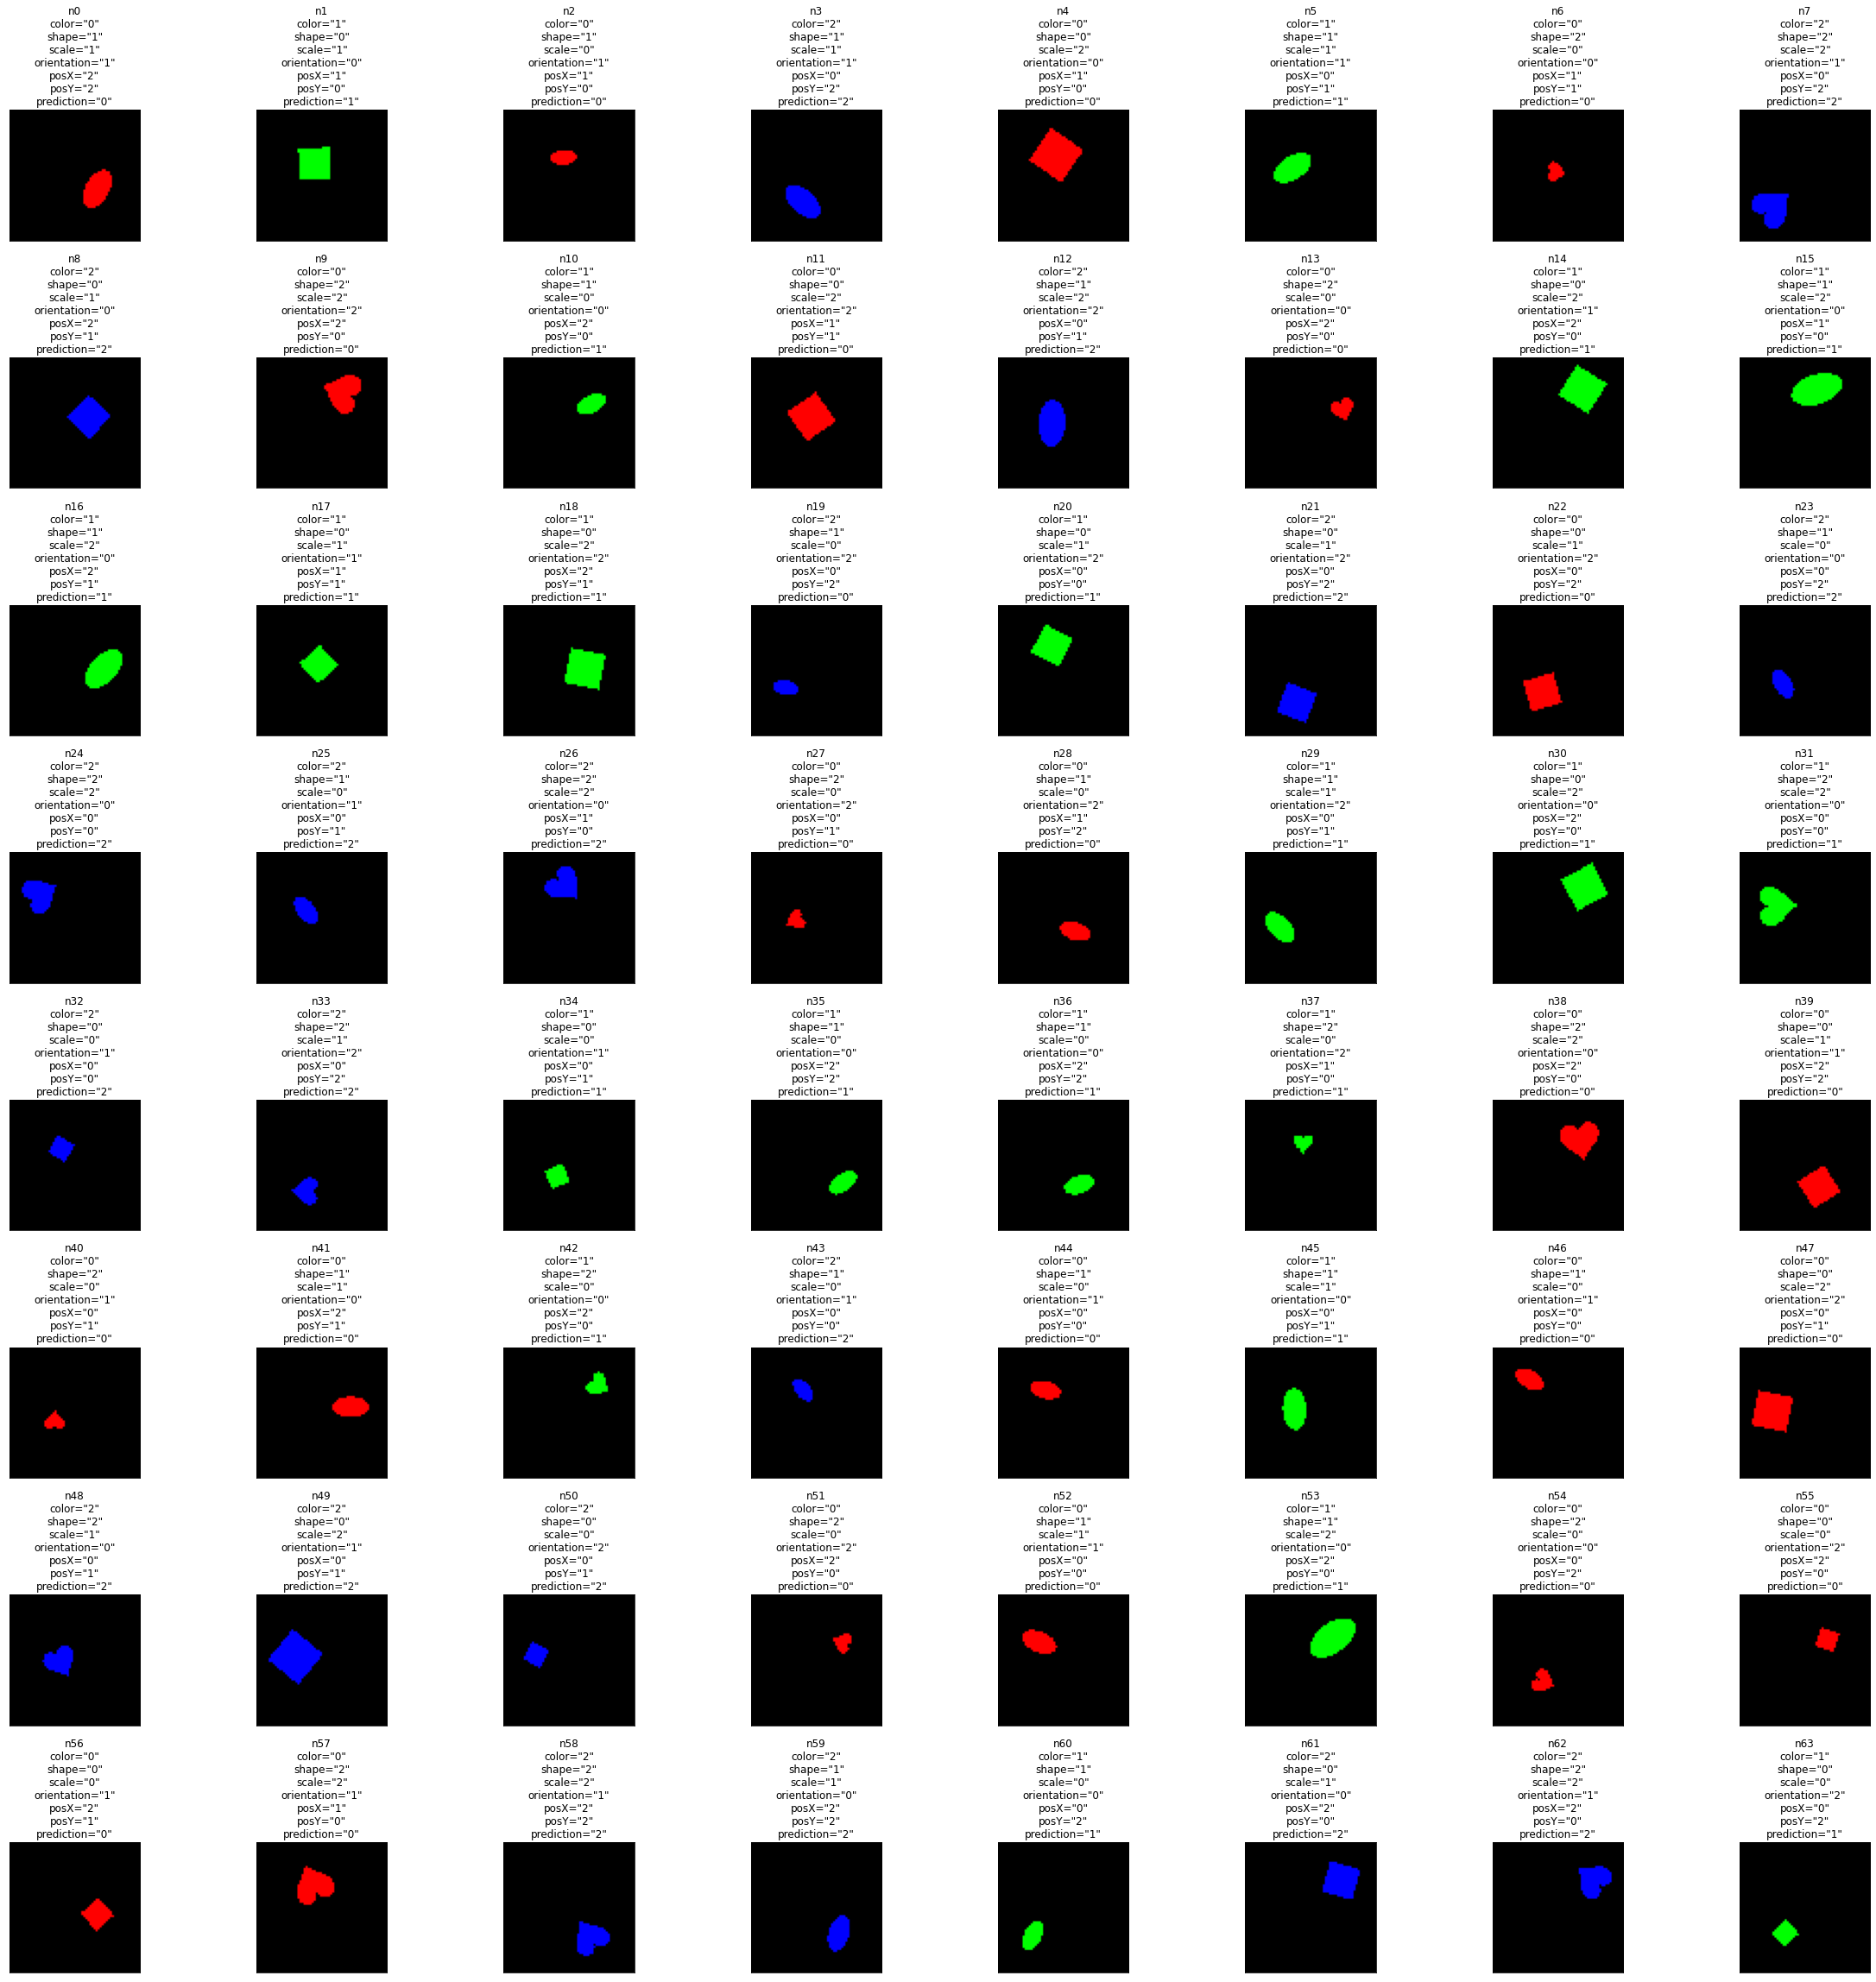

                            
Test on all_cues Accuracy for color: 0.983
Test on all_cues Accuracy for shape: 0.318
Test on all_cues Accuracy for scale: 0.349
Test on all_cues Accuracy for orientation: 0.331
Test on all_cues Accuracy for posX: 0.334
Test on all_cues Accuracy for posY: 0.334


In [13]:
de_biasing_exp(n_epochs=10)

As we can see the model trained during this experiment is indeed biased to the "easy_to_bias_cue". Let's add some off-diagonal samples to the train dataloader:

Epoch 10/10 train mean stats:
    loss: 0.004293111654220911
    Accuracy: 0.999


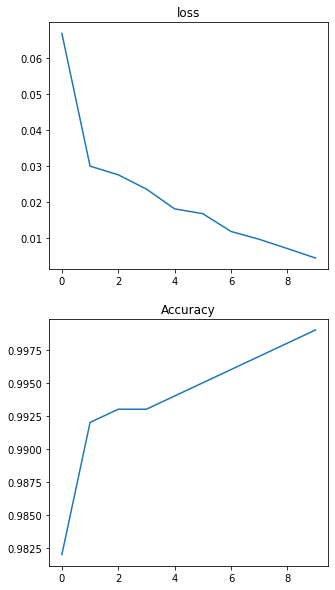

                                
Epoch 10/10 val diag mean stats:
    Accuracy: 0.999


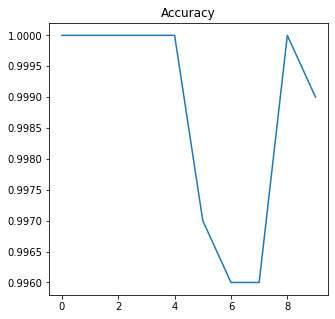

                                 
Epoch 10/10 val scale mean stats:
    Accuracy: 0.499


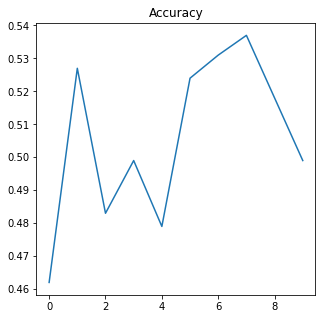

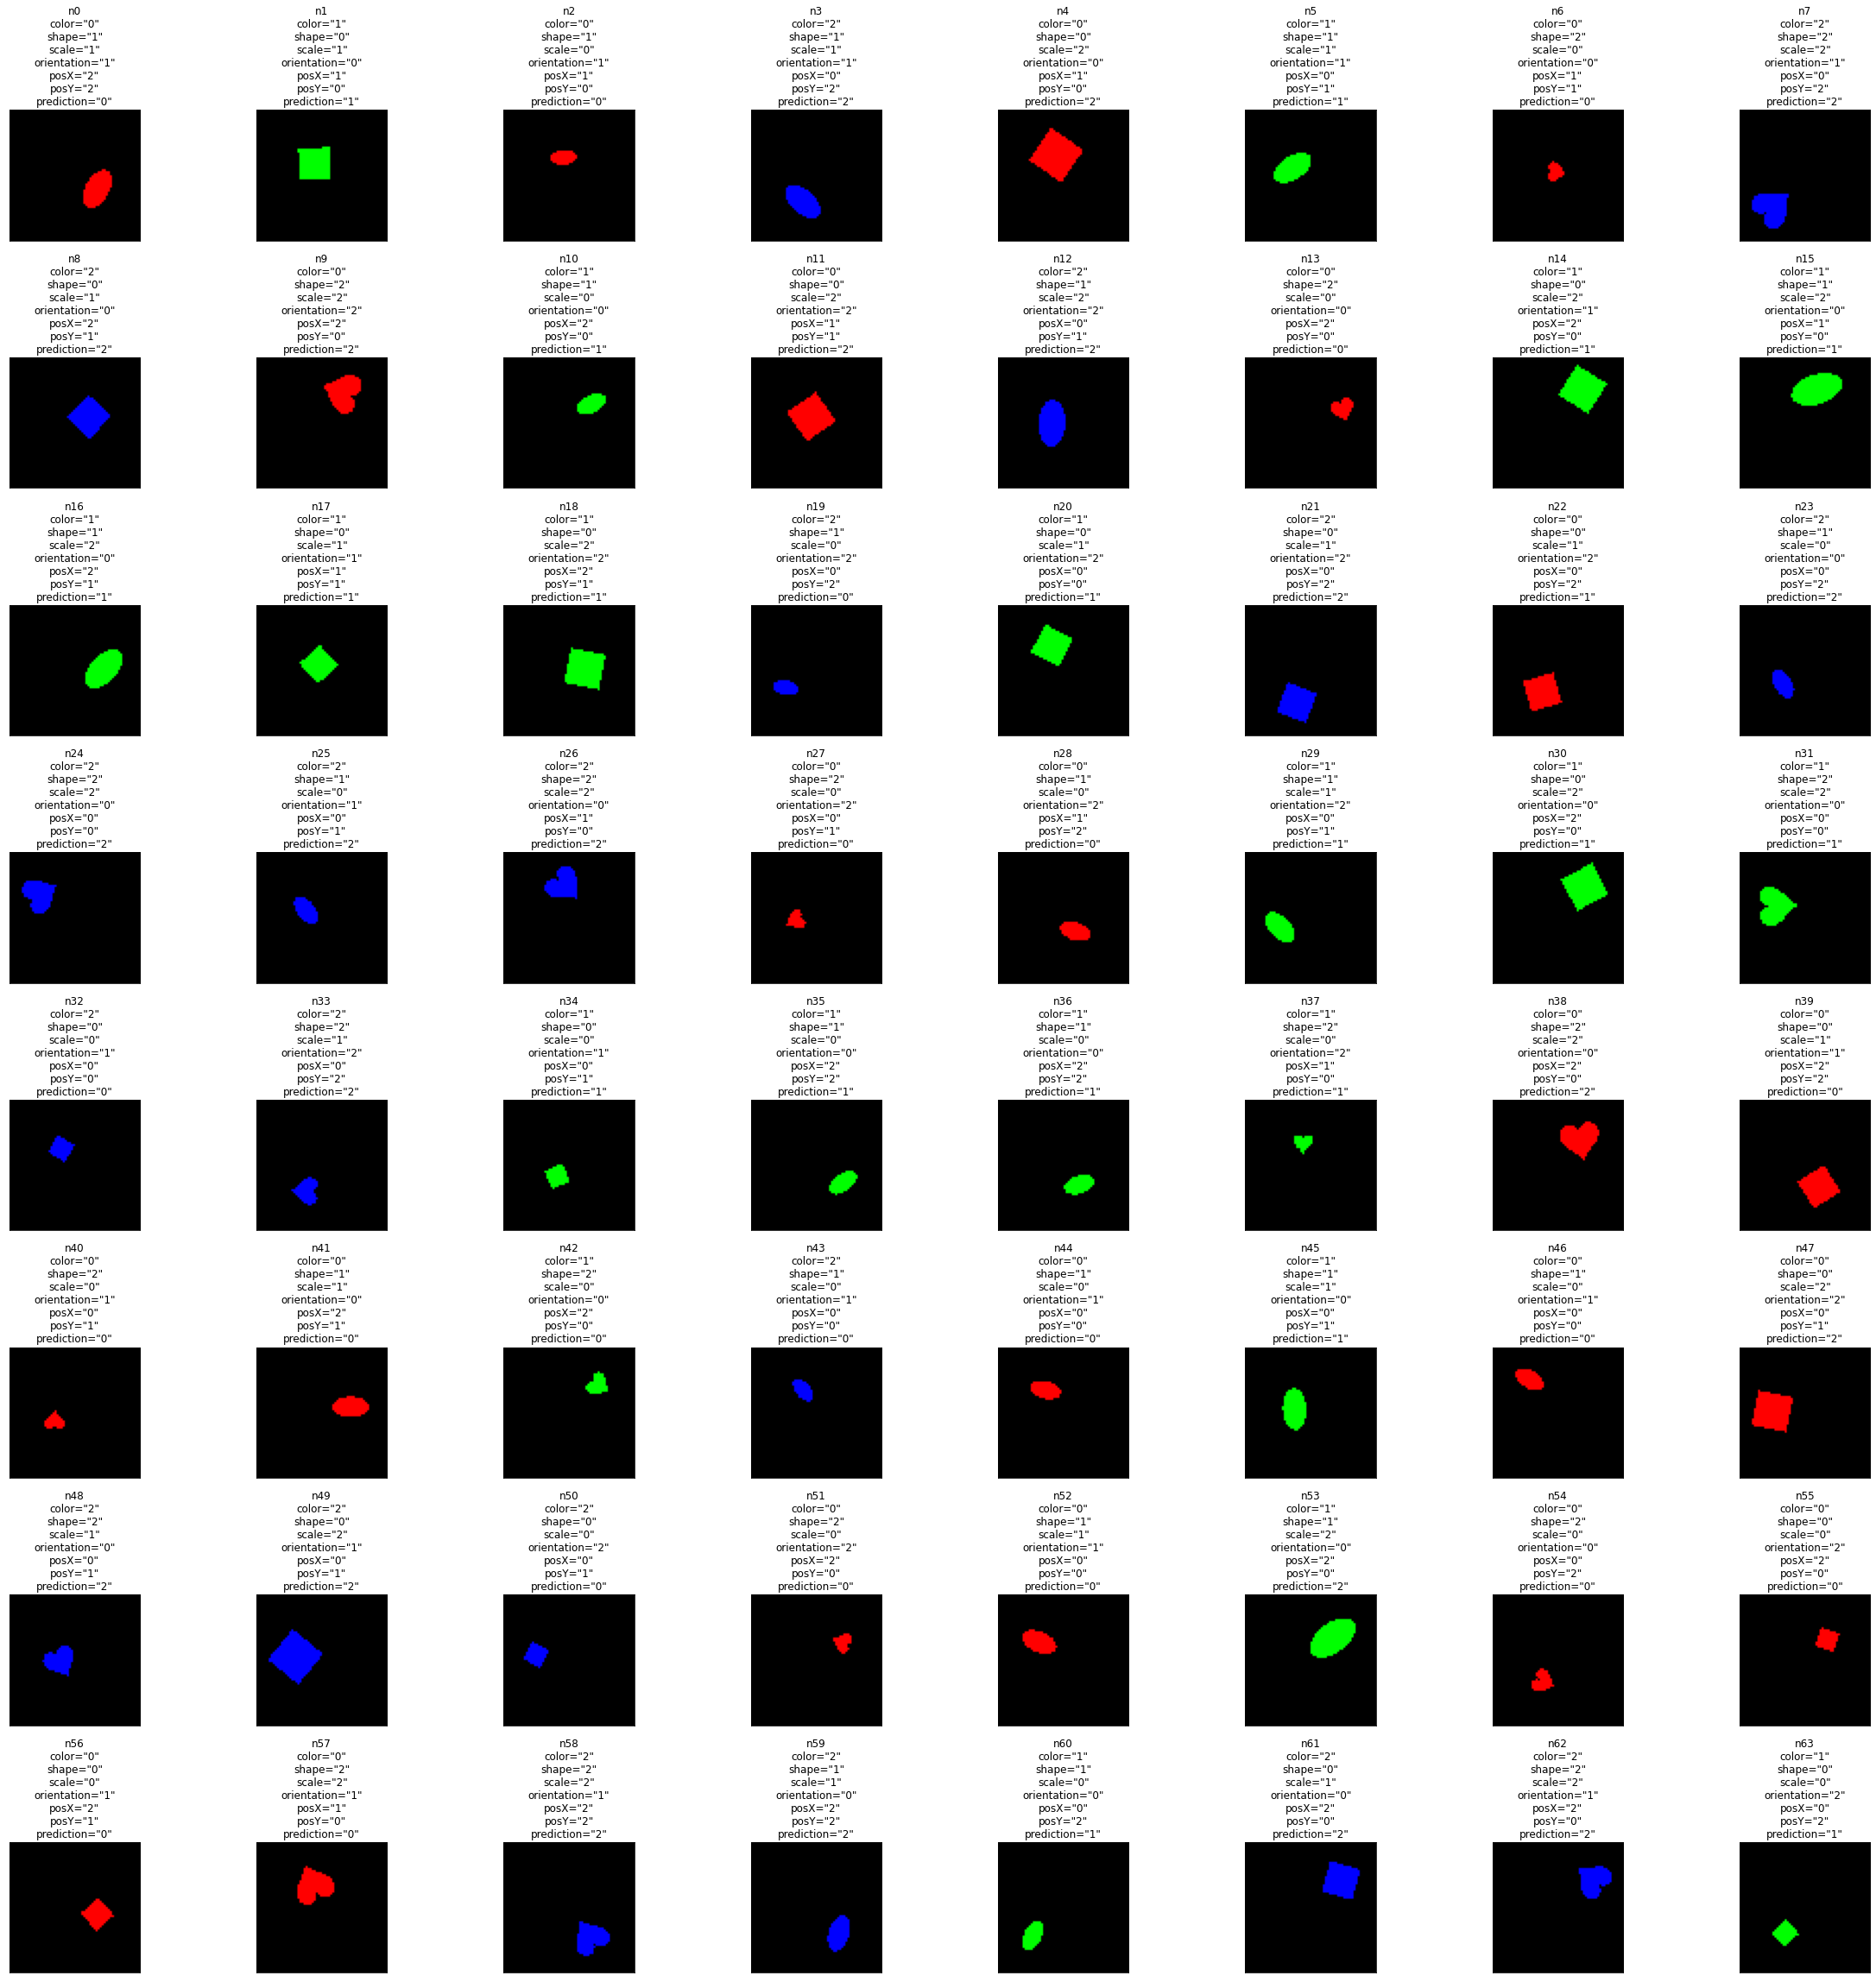

                            
Test on all_cues Accuracy for color: 0.805
Test on all_cues Accuracy for shape: 0.27
Test on all_cues Accuracy for scale: 0.492
Test on all_cues Accuracy for orientation: 0.326
Test on all_cues Accuracy for posX: 0.321
Test on all_cues Accuracy for posY: 0.331


In [14]:
de_biasing_exp(
    make_train_dataloader=datasets.prepare_de_biasing_task_dataloader_maker(
        off_diag_proportion=OFF_DIAG_PROPORTION
    ),
    n_epochs=10
)

New model is less biased to the "easy_to_bias_cue" but is still far from predicting the "ground_truth_cue" correctly. 

What about using a custom loss that treats diagonal and off-diagonal samples differently?

### Apply diagonal and off-diagonal weights in "WeightedCrossEntropy" loss. (10 points)

In [15]:
class WeightedCrossEntropy:
    """
    Class for the modification of the cross entropy loss 
    which has different weights for diagonal and off-diagonal loss elements.

    Where i-th loss element is L(x_i, y_i),
    when (x_i, y_i) is the i-th sample, 
    i.e. x_i and y_i are i-th input and ground truth label correspondingly,
    and L(x, y) -> R is some loss function.

    Loss element is called diagonal (off-diagonal) 
        if it is computed for the diagonal (off-diagonal) sample.
    """

    def __init__(
        self, 
        off_diag_weight: float, 
        diag_weight: float
    ):
        """
        Initialize WeightedCrossEntropy.

        Args:
            off_diag_weight (float): a weight given to the off-diagonal 
                loss elements. 
                Stored in "self.off_diag_weight".

            diag_weight (float): a weight given to the diagonal loss elements.
                Stored in "self.diag_weight".
        """

        self.off_diag_weight = off_diag_weight
        self.diag_weight = diag_weight
        self.ce = nn.CrossEntropyLoss(reduction="none") 
        self.use_second_labels = True

    def apply_weights(
        self, 
        unreduced_loss: torch.Tensor, 
        ground_truth_labels: torch.Tensor, 
        easy_to_bias_labels: torch.Tensor
    ) -> torch.Tensor:
        """
        Apply "self.off_diag_weight" to the off-diagonal loss elements 
        and "self.diag_weight" to the diagonal loss elements. 
        Then compute mean value of all loss elements. 

        Args:

            unreduced_loss (torch.Tensor): 
                a sequence of loss elements for each sample in a batch, 
                i.e. [L(x_i, y_i)]_i.

            ground_truth_labels (torch.Tensor):
                a sequence of ground truth labels, i.e. [y_i]_i.

            easy_to_bias_labels (torch.Tensor):
                a sequence of labels assigned 
                according to the "easy to bias" cue.

        Returns: 
            loss (torch.Tensor): mean value of loss elements 
                after applying corresponding weights to the diagonal 
                and off-diagonal loss elements.
        """
        ######### ATTENTION PLEASE
        diag_indices = ground_truth_labels == easy_to_bias_labels

        # if not diag_indices.all():
        #     print("helo")
        # print(diag_indices)
        # print(
        #     torch.cat(
        #         [self.diag_weight * unreduced_loss[diag_indices], self.off_diag_weight * unreduced_loss[~diag_indices]],
        #         dim=-1
        #     ).shape
        # )

        # print(unreduced_loss[diag_indices].shape)
        # print(unreduced_loss[~diag_indices].shape)
        # raise OSError

        return torch.cat(
            [
                self.diag_weight * unreduced_loss[diag_indices],
                self.off_diag_weight * unreduced_loss[~diag_indices],
            ],
            dim=-1
        ).mean()
        ######### THANK YOU FOR YOUR ATTENTION

    def __call__(self, pred, ground_truth_labels, easy_to_bias_labels):
        unreduced_loss = self.ce(pred, ground_truth_labels)
        
        return self.apply_weights(
            unreduced_loss, 
            ground_truth_labels, 
            easy_to_bias_labels
        )


def prepare_weighted_ce_maker(off_diag_weight, diag_weight):
    def make_weighted_ce():
        return WeightedCrossEntropy(off_diag_weight, diag_weight)

    return make_weighted_ce

Now we will run an experiment with a weighted loss that uses "INVERTED_OFF_DIAG_PROPORTION" as a weight for the off-diag samples (we use an ADAM optimizer here, its factory function is made by function [train.prepare_adam_optimizer_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L471-L487)):

Epoch 4/4 train mean stats:
    loss: 0.9207748620750044
    Accuracy: 0.764


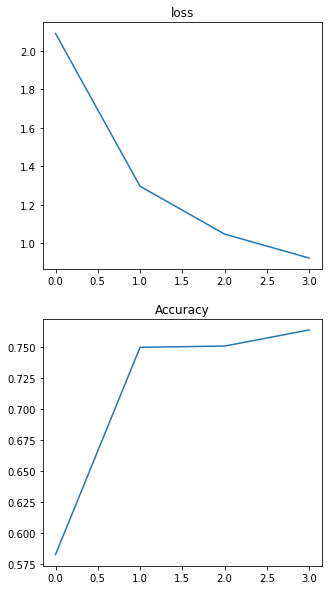

                              
Epoch 4/4 val diag mean stats:
    Accuracy: 0.792


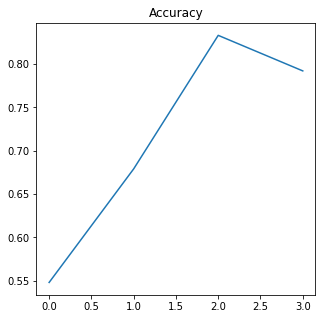

                               
Epoch 4/4 val scale mean stats:
    Accuracy: 0.765


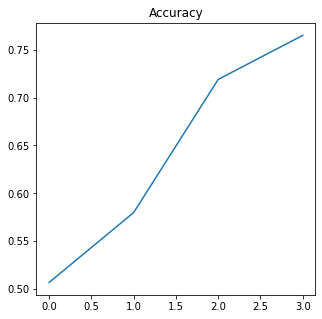

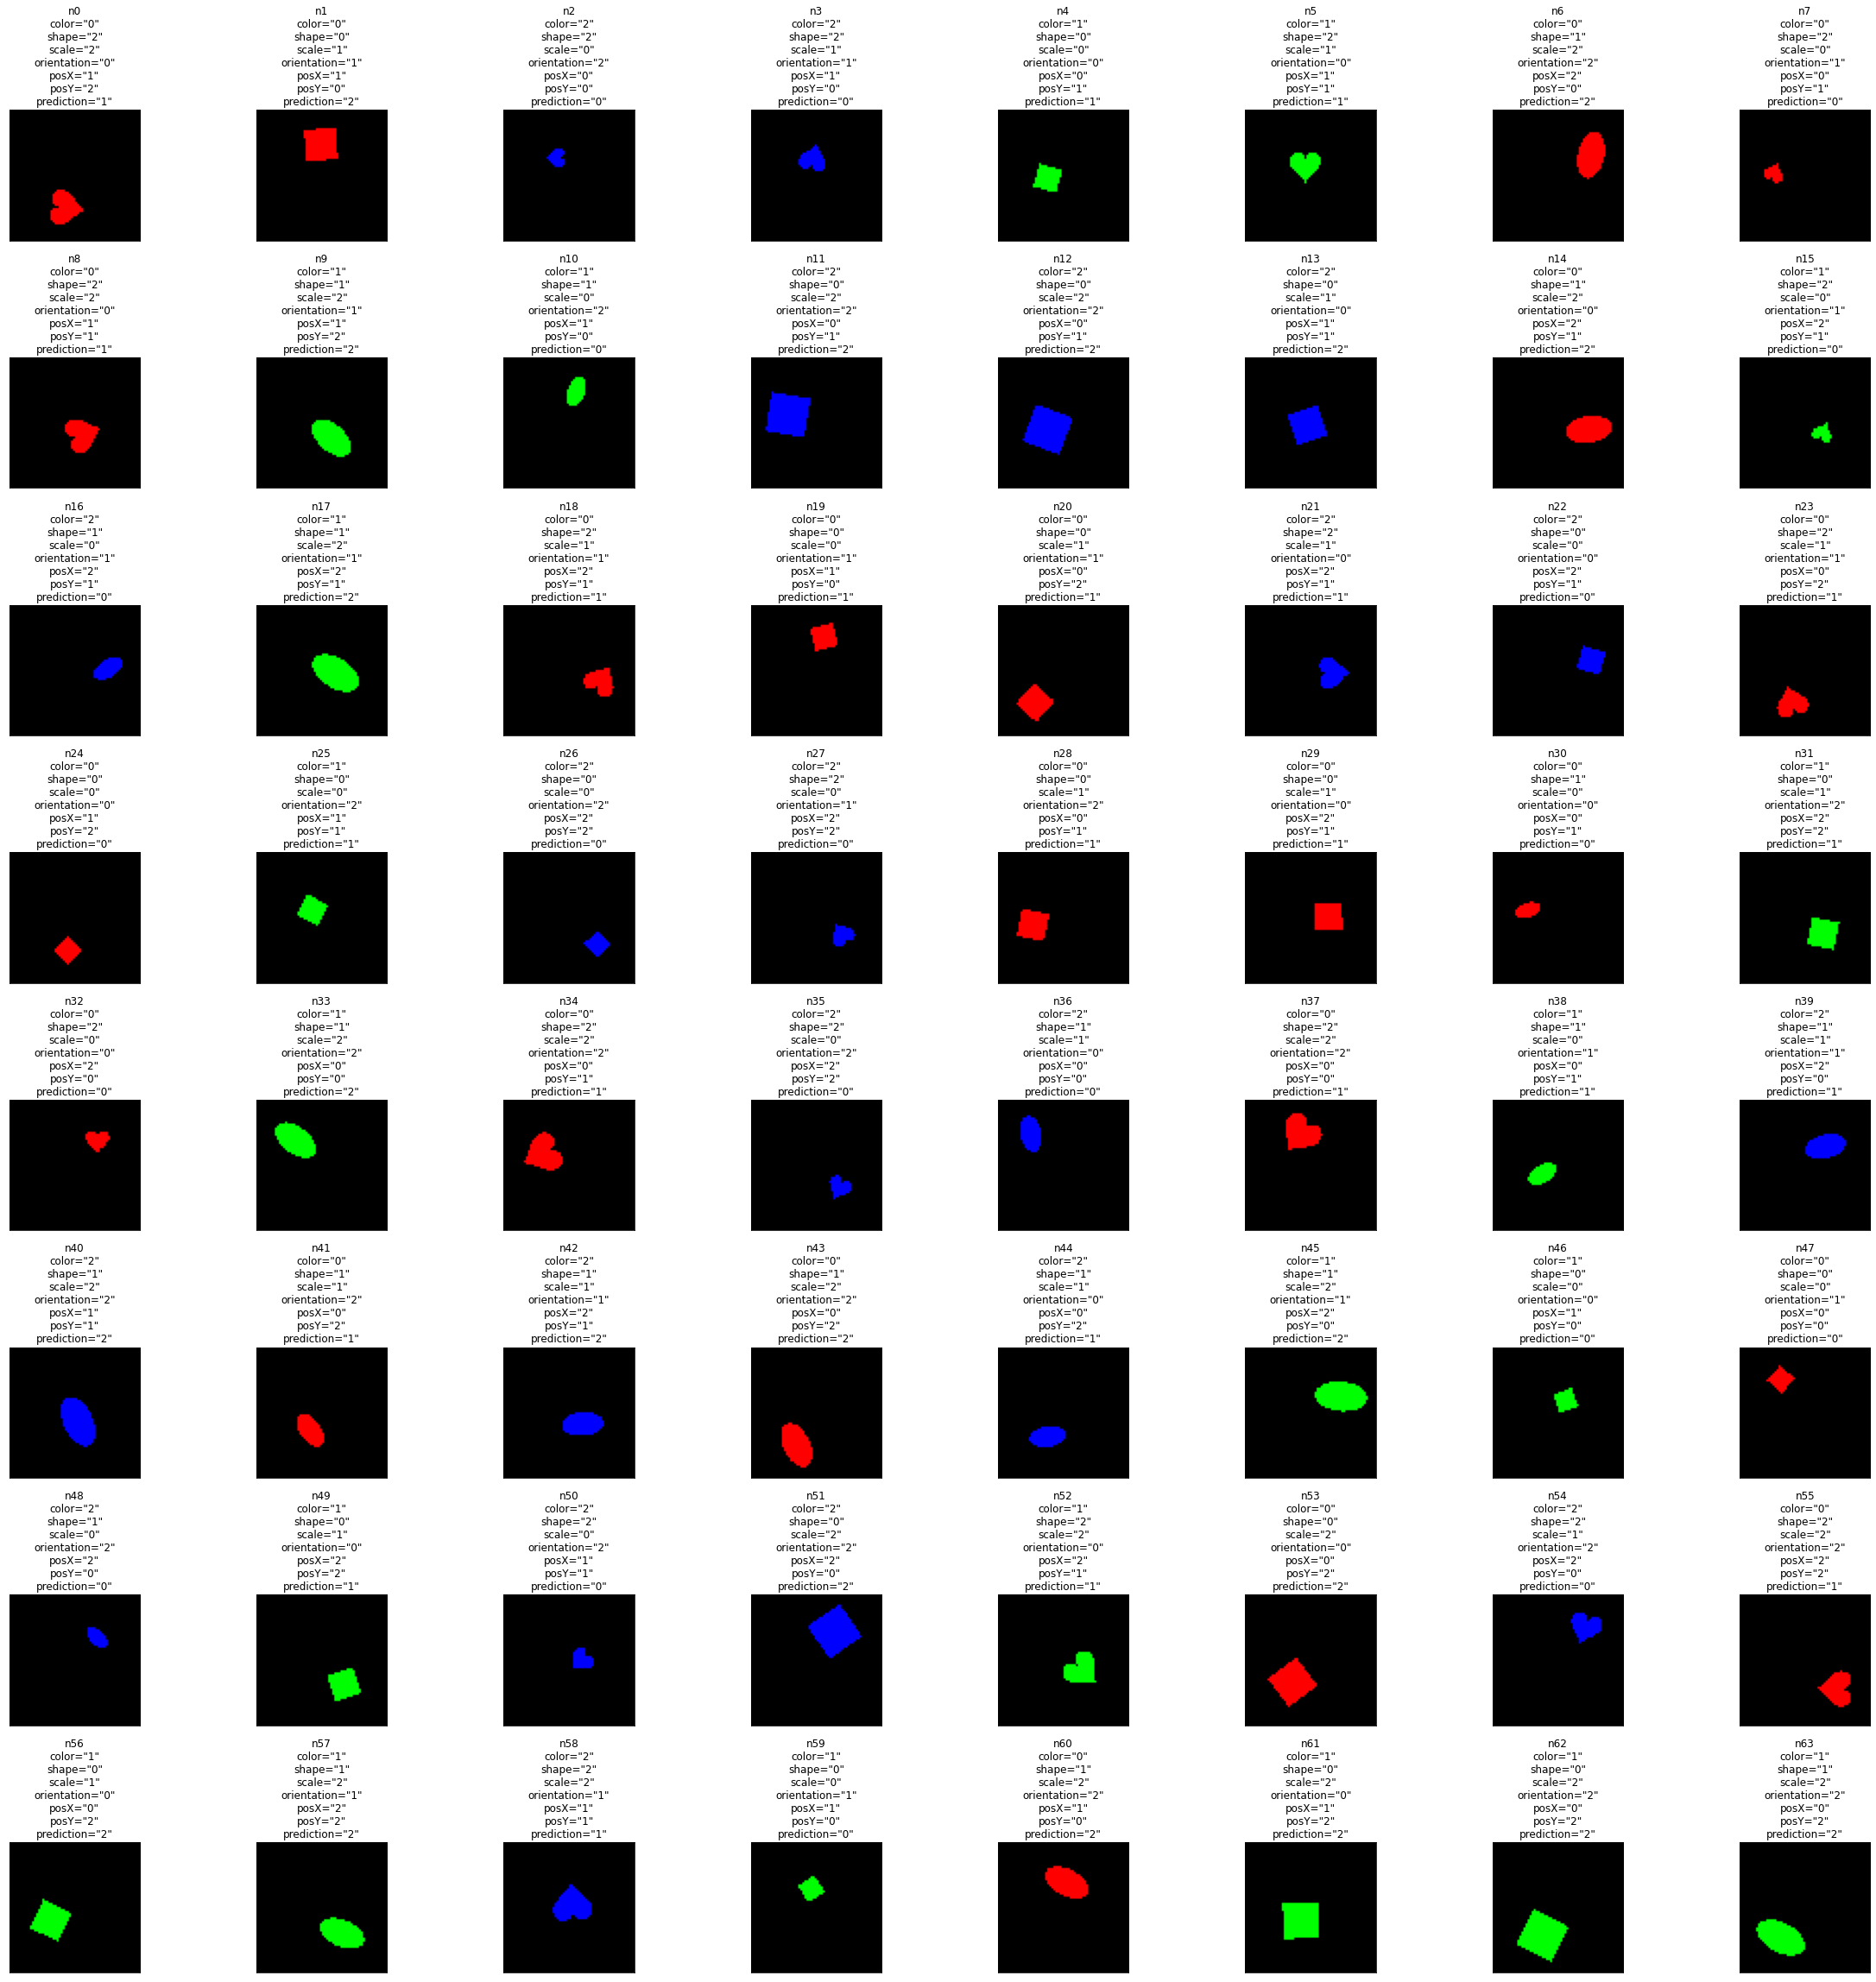

                            
Test on all_cues Accuracy for color: 0.352
Test on all_cues Accuracy for shape: 0.231
Test on all_cues Accuracy for scale: 0.758
Test on all_cues Accuracy for orientation: 0.33
Test on all_cues Accuracy for posX: 0.32
Test on all_cues Accuracy for posY: 0.354


In [34]:
de_biasing_exp(
    n_epochs=4,
    make_train_dataloader=datasets.prepare_de_biasing_task_dataloader_maker(
        off_diag_proportion=OFF_DIAG_PROPORTION
    ),
    make_criterion=prepare_weighted_ce_maker(
        off_diag_weight=INVERTED_OFF_DIAG_PROPORTION,
        diag_weight=0.75
    ),
    make_optimizer=train.prepare_adam_optimizer_maker(start_lr=0.005),
    random_seed=1332
)

Modifying loss is quite a useful approach, but it sounds not sophisticated enough. Why don't we try Domain-Adversarial Training of Neural Networks (DANN) method inspired by [this paper](https://arxiv.org/abs/1505.07818)?

To implement this approach we will use the "ResNetWrapperForDANN":

In [47]:
class ResNetWrapperForDANN(nn.Module):
    """
    A wrapper for ResNet18 model to prepare it for the DANN method.
    It has a feature extractor "self.Gf", 
    a "ground_truth" label predictor head "self.Gy"
    and an "easy_to_bias" label predictor head "self.Gd" 
    (a substitution for the domain predictor from the DANN paper, 
    that is why "d").
    """

    def __init__(self, resnet_model):  # TODO: make this better
        super().__init__()

        self.Gf = nn.Sequential(
            resnet_model.conv1, 
            resnet_model.bn1, 
            resnet_model.relu,
            resnet_model.maxpool,
            resnet_model.layer1,
            resnet_model.layer2,
            resnet_model.layer3, 
            resnet_model.layer4,
            resnet_model.avgpool
        )

        in_features = resnet_model.fc.in_features
        out_features = resnet_model.fc.out_features

        self.Gy = nn.Linear(in_features, out_features)
        self.Gd = nn.Linear(in_features, out_features)

        self.is_train = True

    def __call__(self, input):
        features = self.Gf(input)
        features = features.transpose(3, 1) 

        Gy_output = self.Gy(features).squeeze()

        if self.is_train:
            return Gy_output, self.Gd(features).squeeze()
        else:
            return Gy_output

    # def train(self):
    #     self.is_train = True
    #     self.Gf.train()
    #     self.Gy.train()
    #     self.Gd.train() 

    # def eval(self):
    #     self.is_train = False
    #     self.Gf.eval()
    #     self.Gy.eval()
    #     self.Gd.eval() 

    # def to(self, device):
    #     self.Gf.to(device)
    #     self.Gy.to(device)
    #     self.Gd.to(device)
    
    # def parameters(self):
    #     for param in self.Gf.parameters():
    #         yield param
    #     yield self.Gy
    #     yield self.Gd


def make_resnet_18_for_DANN():
    return ResNetWrapperForDANN(models.prepare_resnet18_maker()())

The idea of this approach is to simultaneously update weights of feature extractor "Gf" to both decrease loss (increase accuracy) for "ground_truth_cue" head "Gy" and increase loss (decrease accuracy) for "easy_to_bias_cue" head "Gd". 

In an ideal case after this adversarial training, "Gf" will extract such features that will be informative for distinguishing "ground_truth_cue" and totally non-informative for distinguishing "easy_to_bias_cue".

For this increase-decrease (adversarial) task we will use a pair of optimizers. One will be using gradients of loss for Gy predictions, another will be using gradients of loss for Gd predictions. 

### Choose which parameters which optimizer should update (5 points):

In [18]:
class OptimizerForDANN:
    """
    An optimizer for the DANN method. Contains two sub-optimizers: 
    
      - self.Gy_loss_optimizer for both Gy_loss 
        and inverted (multiplied by -1) Gd_loss.

      - self.Gd_loss_optimizer for only Gd_loss. 

    Even though self.Gy_loss_optimizer optimizes Gy_loss and inverted Gd_loss,
    for name simplicity reasons it does not contain Gd_loss in its name
    (losses are explained in "CriterionForDann").
    """

    def __init__(
        self, 
        model, 
        optimizer_constructor,
        lr,
        **optimizer_kwargs
    ):
        assert isinstance(model, ResNetWrapperForDANN)

        featurizer_params = list(
            filter(lambda p: p.requires_grad, model.Gf.parameters())
        )  # TODO: check whether this changes anything
        Gy_predictor_params = list(
            filter(lambda p: p.requires_grad, model.Gy.parameters())
        )
        Gd_predictor_params = list(
            filter(lambda p: p.requires_grad, model.Gd.parameters())
        )

        self.Gy_loss_optimizer_params, self.Gd_loss_optimizer_params \
            = self.assign_params_to_optimizers(
                featurizer_params, 
                Gy_predictor_params, 
                Gd_predictor_params
            )
        
        self.start_lr = lr
        self.Gy_loss_optimizer = optimizer_constructor(
            self.Gy_loss_optimizer_params,
            lr=lr,
            **optimizer_kwargs
        )
        self.Gd_loss_optimizer = optimizer_constructor(
            self.Gd_loss_optimizer_params,  
            lr=lr,
            **optimizer_kwargs
        )

    def assign_params_to_optimizers(
        self, 
        featurizer_params: List[torch.Tensor], 
        Gy_predictor_params: List[torch.Tensor], 
        Gd_predictor_params: List[torch.Tensor]
    ) -> Tuple[List[torch.Tensor], List[torch.Tensor]]:
        """
        Choose which params of "ResNetWrapperForDANN" model
        each optimizer should optimize.
        
        Args:
            featurizer_params (List[torch.Tensor]): 
                params of the featurizer (model.Gf).

            Gy_predictor_params (List[torch.Tensor]): 
                params of the ground truth label predictor head (model.Gy).

            Gd_predictor_params (List[torch.Tensor]): 
                params of the easy to bias label predictor head (model.Gd).

        Returns:
        
            Gy_loss_optimizer_params (List[torch.Tensor]): params 
                for the self.Gy_loss_optimizer suboptimizer.

            Gd_loss_optimizer_params (List[torch.Tensor]): params 
                for the self.Gd_loss_optimizer suboptimizer.
        """
        ######### ATTENTION PLEASE
        Gy_loss_optimizer_params = featurizer_params + Gy_predictor_params
        Gd_loss_optimizer_params = Gd_predictor_params
        ######### THANK YOU FOR YOUR ATTENTION
        
        return Gy_loss_optimizer_params, Gd_loss_optimizer_params

    def zero_grad(self):
        self.Gy_loss_optimizer.zero_grad()
        self.Gd_loss_optimizer.zero_grad()


def prepare_optimizer_for_DANN_maker(
    optimizer_constructor=optim.SGD,
    lr=DEFAULT_START_LR,
    **optimizer_kwargs
):
    def make_optimizer_for_DANN(model):
        return OptimizerForDANN(
            model, 
            optimizer_constructor,
            lr,
            **optimizer_kwargs
        )

    return make_optimizer_for_DANN


# scheduler similar to the one in the paper
class SchedulerForDANN:

    def __init__(self, optimizer, alpha=ALPHA, beta=BETA):
        assert isinstance(optimizer, OptimizerForDANN)
        self.optimizer = optimizer
        self.start_lr = self.optimizer.start_lr
        self.alpha = alpha 
        self.beta = beta 
        self.training_progress = 0
        self.step()

    def step(self):
        denominator = (1 + self.alpha * self.training_progress)**self.beta
        current_lr = self.start_lr / denominator
        self.optimizer.Gd_loss_optimizer.param_groups[0]['lr'] = current_lr
        self.optimizer.Gy_loss_optimizer.param_groups[0]['lr'] = current_lr


def prepare_scheduler_for_DANN_maker(alpha, beta):
    def make_scheduler_for_DANN(optimizer):
        return SchedulerForDANN(optimizer, alpha, beta)

    return make_scheduler_for_DANN

### How to compute "Gy_loss" and "Gd_loss" for the DANN criterion? (5 points)

In [19]:
class CriterionForDANN(nn.Module):
    """
    Compute loss for predictions of "model.Gy" 
    and "ground truth labels" (Gy_loss) 
    as well as loss for predictions of "model.Gd"
    and "easy to bias labels" (Gd_loss).
    Where model is of type "ResNetWrapperForDANN".

    "self.f_lambda" is a weight with which negative Gd_loss is used 
    to compute gradients for "model.Gf".

    "self.d_lambda" is a weight with which Gd_loss is used 
    to compute gradients for "model.Gd".
    """
    def __init__(self, Gd_loss_weight, gamma):
        self.ce = train.make_ce_criterion()
        self.f_lambda = 0
        self.d_lambda = Gd_loss_weight 
        self._training_progress = 0
        self.gamma = gamma
        self.use_second_labels = True

    @property
    def training_progress(self):
        return self._training_progress

    @training_progress.setter
    def training_progress(self, new_value):
        self._training_progress = new_value
        self._update_f_lambda()

    # update for loss weights similar to the one in the paper
    def _update_f_lambda(self):
        assert self.training_progress >= 0
        assert self.training_progress <= 1
        self.f_lambda = (
            2 * torch.sigmoid(
                torch.tensor([self.gamma * self.training_progress])
            ).item() - 1
        )

    def __call__(self, pred, ground_truth_labels, easy_to_bias_labels):
        def compute_losses(
            compute_loss: Callable,
            Gy_pred: torch.Tensor, 
            Gd_pred: torch.Tensor, 
            ground_truth_labels: torch.Tensor, 
            easy_to_bias_labels: torch.Tensor
        ) -> Tuple[torch.Tensor, torch.Tensor]:
            """
            Compute Gy_loss and Gd_loss.

            Args:

                compute_loss (Callable): function used to compute loss 
                    for predictions and labels.

                Gy_pred (torch.Tensor): predictions by model.Gy.

                Gd_pred (torch.Tensor): predictions by model.Gd.

                ground_truth_labels (torch.Tensor):
                    a sequence of ground truth labels, i.e. [y_i]_i.

                easy_to_bias_labels (torch.Tensor):
                    a sequence of labels assigned 
                    according to the "easy to bias" cue.

            Returns:

                Gy_loss (torch.Tensor): loss for Gy_pred and
                    ground_truth_labels.

                Gd_loss (torch.Tensor): loss for Gd_pred and
                    easy_to_bias_labels.
            """
            ######### ATTENTION PLEASE
            Gy_loss = compute_loss(Gy_pred, ground_truth_labels)
            Gd_loss = compute_loss(Gd_pred, easy_to_bias_labels)
            ######### THANK YOU FOR YOUR ATTENTION
            
            return Gy_loss, Gd_loss

        assert len(pred) == 2, \
            "Expect target predictor output and domain predictor output" 

        Gy_pred, Gd_pred = pred

        Gy_loss, Gd_loss = compute_losses(
            self.ce,
            Gy_pred, 
            Gd_pred, 
            ground_truth_labels, 
            easy_to_bias_labels
        )

        return Gy_loss, Gd_loss, self.f_lambda, self.d_lambda


def prepare_criterion_for_DANN_maker(Gd_loss_weight=D_LAMBDA, gamma=GAMMA):
    def make_criterion_for_DANN():
        return CriterionForDANN(Gd_loss_weight, gamma)

    return make_criterion_for_DANN

### How to properly update weights of the model in "do_dann_train_func"? (10 points)

In [20]:
# import torch
# x = torch.tensor(5., requires_grad=True)
# adam_x = torch.optim.Adam([x])
# y = 2 * x
# z = y - 2
# w = y + 2

# # x.requires_grad_(False)

# adam_x.zero_grad()
# z.backward(retain_graph=True)
# # print(x.grad)
# adam_x.step()
# print(x)

# # w.backward(retain_graph=True)
# # print(x.grad)

# # x.requires_grad_(True)
# w.backward()
# adam_x.zero_grad()
# adam_x.step()
# print(x)
# print(y)
# print(z)

In [21]:
# x = torch.tensor(5., requires_grad=True)
# y = 2 * x
# z = y - 2

# y.requires_grad_(False)
# z.backward()
# x.grad

In [22]:
# torch.autograd.set_detect_anomaly(True)

In [84]:
def do_dann_train_func(
    model: nn.Module,
    criterion: Callable,
    optimizer: object,
    images_batch: torch.Tensor,
    labels_batch: torch.Tensor,
    second_labels_batch: torch.Tensor,
    epoch_histories: Dict[str, List[float]]
) -> Tuple[torch.Tensor, Dict[str, List[float]]]:
    """
    <do_train_func> for UT-TML repo function "train.run_epoch" 
        in a DANN scenario.

    Args and Returns:
        same as for UT-TML repo function "train.do_default_train".
    """
    def do_optimizer_steps(
        optimizer: OptimizerForDANN, 
        total_loss: torch.Tensor, 
        weighted_Gd_loss: torch.Tensor
    ) -> None:
        """
        Perform steps by the "OptimizerForDann"'s suboptimizers. 
        One optimizes <total_loss> another optimizes <weighted_Gd_loss>.
        Where <total_loss> and <weighted_Gd_loss> have been computed using 
        Gy_loss and Gd_loss returned by the "CriterionForDANN".

        Args:
            optimizer (OptimizerForDann): "OptimizerForDann" which will update 
                model weights using gradients from the <total_loss> 
                and the <weighted_Gd_loss>.

            total_loss (torch.Tensor): loss term computed 
                as Gy_loss - "CriterionForDANN".f_lambda * Gd_loss.

            weighted_Gd_loss (torch.Tensor): loss term computed 
                as "CriterionForDANN".d_lambda * Gd_loss
        """
        ######### ATTENTION PLEASE
        # Incorrect solution
        # optimizer.Gy_loss_optimizer.zero_grad()
        # total_loss.backward(retain_graph=True)

        # # Can't ``optimizer.Gy_loss_optimizer.step()`` here
        # optimizer.Gy_loss_optimizer.step()

        # optimizer.Gd_loss_optimizer.zero_grad()

        # weighted_Gd_loss.backward()

        # optimizer.Gd_loss_optimizer.step()

        # # Not so clean solution
        # optimizer.Gy_loss_optimizer.zero_grad()
        # total_loss.backward(retain_graph=True)

        # # Can't ``optimizer.Gy_loss_optimizer.step()`` here
        # # optimizer.Gy_loss_optimizer.step()

        # for param in optimizer.Gy_loss_optimizer.param_groups[0]["params"]:
        #     param.requires_grad_(False)

        # optimizer.Gd_loss_optimizer.zero_grad()

        # weighted_Gd_loss.backward()

        # for param in optimizer.Gy_loss_optimizer.param_groups[0]["params"]:
        #     param.requires_grad_(True)

        # optimizer.Gy_loss_optimizer.step()
        # optimizer.Gd_loss_optimizer.step()

        # Clean solution
        optimizer.Gy_loss_optimizer.zero_grad()
        total_loss.backward(
            retain_graph=True,
            inputs=optimizer.Gy_loss_optimizer.param_groups[0]["params"]
        )
        optimizer.Gy_loss_optimizer.step()

        optimizer.Gd_loss_optimizer.zero_grad()
        weighted_Gd_loss.backward(
            inputs=optimizer.Gd_loss_optimizer.param_groups[0]["params"]
        )
        optimizer.Gd_loss_optimizer.step()
        ######### THANK YOU FOR YOUR ATTENTION
    
    assert isinstance(optimizer, OptimizerForDANN), \
        "Optimizer should be OptimizerForDANN"
    assert isinstance(criterion, CriterionForDANN), \
        "Criterion should be CriterionForDANN"

    pred_batch = model(images_batch)

    Gy_loss, Gd_loss, f_lambda, d_lambda = criterion(
        pred_batch, 
        labels_batch, 
        second_labels_batch
    )
    total_loss = Gy_loss - f_lambda * Gd_loss
    weighted_Gd_loss = d_lambda * Gd_loss

    do_optimizer_steps(optimizer, total_loss, weighted_Gd_loss)

    utils.append_to_list_in_dict(
        epoch_histories, 
        "total_loss", 
        total_loss.item()
    )
    utils.append_to_list_in_dict(
        epoch_histories, 
        "Gy_loss", 
        Gy_loss.item()
    )
    utils.append_to_list_in_dict(
        epoch_histories, 
        "Gd_loss", 
        Gd_loss.item()
    )
    
    return pred_batch[0], epoch_histories

Let's run debiasing experiment using DANN method:

In [75]:
de_biasing_exp(
    n_epochs=70,
    make_train_dataloader=datasets.prepare_de_biasing_task_dataloader_maker(
        off_diag_proportion=OFF_DIAG_PROPORTION,
        batch_size=512
    ),
    make_model=make_resnet_18_for_DANN,
    make_optimizer=prepare_optimizer_for_DANN_maker(lr=0.001, momentum=0.9),
    make_criterion=prepare_criterion_for_DANN_maker(Gd_loss_weight=1, gamma=10),
    make_scheduler=prepare_scheduler_for_DANN_maker(alpha=ALPHA, beta=BETA),
    do_train_func=do_dann_train_func
)

# de_biasing_exp(
#     n_epochs=100,  # 100
#     make_train_dataloader=datasets.prepare_de_biasing_task_dataloader_maker(
#         off_diag_proportion=OFF_DIAG_PROPORTION,
#         batch_size=128
#     ),
#     make_model=make_resnet_18_for_DANN,
#     make_optimizer=prepare_optimizer_for_DANN_maker(lr=0.001),
#     make_criterion=prepare_criterion_for_DANN_maker(Gd_loss_weight=1, gamma=10),
#     make_scheduler=prepare_scheduler_for_DANN_maker(alpha=ALPHA, beta=BETA),
#     do_train_func=do_dann_train_func
# )

Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Reusing object from RAM with fingerprint diag_off_diag_dataset_7c0f4bdec9fa49e1d454
Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Reusing object from RAM with fingerprint diag_off_diag_dataset_9a1d51c8bc5b80a89d5a
Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Loading cached default_dsprites_dataloaders from /tmp/ood_cache/default_dsprites_dataloaders_a10d77455843fbf1d203.pkl
Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Reusing object from RAM with fingerprint default_dsprites_dataloaders_6049af145a21f36ab291
torch.Size([512, 3]) torch.Size([512, 3]) torch.Size([512]) torch.Size([512])


OSError: ignored

In [102]:
# Space

DANN_model = make_resnet_18_for_DANN()
DANN_model.train()
weighted_CE_model = models.prepare_resnet18_maker()()
weighted_CE_model.train()

def num_parameters(model):
    return sum(param.numel() for param in model.parameters() if param.requires_grad)

print(f"Number of parameters for the weighted CE architecture: {num_parameters(weighted_CE_model):,}")
print(f"Number of parameters for the DANN architecture: {num_parameters(DANN_model):,}")

Number of parameters for the weighted CE architecture: 11,178,051
Number of parameters for the DANN architecture: 11,179,590


In [117]:
# Update step time

dummy_input = torch.randn(2, 3, 64, 64)
dummy_task_label = torch.tensor([2, 1], dtype=torch.int64)
dummy_bias_label = torch.tensor([2, 0], dtype=torch.int64)

weighted_CE_loss = prepare_weighted_ce_maker(
        off_diag_weight=INVERTED_OFF_DIAG_PROPORTION,
        diag_weight=0.75
)()
weighted_CE_optimizer = train.prepare_adam_optimizer_maker(start_lr=0.005)(weighted_CE_model)

DANN_loss = prepare_criterion_for_DANN_maker(Gd_loss_weight=1, gamma=10)()
DANN_optimizer = prepare_optimizer_for_DANN_maker(lr=0.001, momentum=0.9)(DANN_model)

In [118]:
%%timeit

train.do_default_train_func(
    weighted_CE_model,
    weighted_CE_loss,
    weighted_CE_optimizer,
    dummy_input,
    dummy_task_label,
    dummy_bias_label,
    {}
)

195 ms ± 3.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [119]:
%%timeit

do_dann_train_func(
    DANN_model,
    DANN_loss,
    DANN_optimizer,
    dummy_input,
    dummy_task_label,
    dummy_bias_label,
    {}
)

219 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [120]:
# Inference time

weighted_CE_model.eval()
_ = DANN_model.eval()

In [121]:
%%timeit

weighted_CE_model(dummy_input)

54.4 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [122]:
%%timeit

DANN_model(dummy_input)

65.7 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Report (15 points)

We want to answer the research question: whether DANN or weighted loss method is better for the de-biasing task?

Make an argument below, based on empirical evidence, which approach is "better"?

For answering this question, consider the following aspects:
- Accuracy.
- Computational complexity.
  - Space and time.
  - Training and inference.
- Fairness of hyperparameter tuning and model choice.

Feel free to run additional model training experiments to support your argument (hyperparameters used for the above experiments were not tuned, so you can tune them).

Note: please take into account that validation and test data for this task both contain the same images but different labels, therefore hyperparameters you might tune will be overfitted not only to validation data but also to test data, but in this exercise it is okay.

First, let us address the **fairness of hyperparameter tuning and model choice**. As the initial values of hyperparameters given in the notebook were not tuned yet, we first tuned them accordingly, both for the weighted CE loss model and DANN.

It is important to remark that for such large models (and limited computational resources in Colab), it is typically infeasible to perform a grid search for hyperparameters, due to the exponential scaling of hyperparameter combinations. This was even more of an issue for DANN, where we had many hyperparameters to tune. We could have also performed Bayesian optimization, but the technique was not mentioned in the notebook so we sticked to "grad student descent", where we manually tweaked the parameters according to the validation performance on the scale task. To mitigate the issue with exponential scaling, we optimized the hyperparameters linearly, according to their importance determined by us. 

We started with tuning the weighted CE model's parameters. To this end, we first observed how the network behaves when trained for many epochs. We started with ``n_epochs = 100`` which clearly resulted in overfitting to the bias cue and did not lead to performant cross-bias generalization. We observed that initially the scale validation performance quickly increased but then kept decreasing throughout the run. Then we tuned the learning rate (``lr = 0.005`` performed best), set ``diag_weight = 0.75`` and left other hyperparameters as is (tuning them did not bring any accuracy gain) and finally chose ``n_epochs = 5`` (early stopping) based on the validation accuracy and the tendency of it to decrease over the epochs.

The DANN model was generally more sensitive to hyperparameter changes. We initially started with the exact hyperparameter configuration introduced in the paper, but we observed divergence with ``lr = 0.01``. We found that ``lr = 0.001`` was a performant choice. As we expected according to the difficulty of the min-max optimization problem in DANN, this model needed considerably more epochs to train. In the end we chose ``n_epochs = 70``. Because of the complexity of the optimization problem, we found that ``momentum = 0.9`` was also crucial to achieve a good validation score. Interestingly, when we trained DANN with Adam, the validation accuracy broke down completely. We left the other hyperparameters as they were initially set, as we found that they were already (close to) optimal and the method was very sensitive to changes in them.

By tuning both model's hyperparameters to our best knowledge, we argue that we give a fair comparison between the methods on this exact dataset and task. We tried the chosen hyperparameter values on a couple of other seeds and learned that they are fairly robust. However, we might have overfitted on the test set, as mentioned in the note above.

Regarding **accuracy**, the weighted CE loss model achieves the highest accuracy in testing (and also for validation):
$$
\begin{align}
\text{acc}_\text{CE}^\text{test} &= 0.758 \\
\text{acc}_\text{DANN}^\text{test} &= 0.668.
\end{align}
$$
This was a somewhat surprising result for us, as even with hyperparameter tuning the (supposedly) more sophisticated method could not get close to the loss-weighted model.

The **memory requirements** of the DANN model are a little bit higher during training, as it employs two linear output heads instead of one. This difference is negligible in practice. The exact numbers can be seen in the cells above. Note that during training this additional linear layer is thrown away, making the two models equal in size.

The **time requirements** of the DANN model update steps are higher for the small batch size tested above. We get a similar result for inference.

### Bonus questions (5 + 5 = 10 points)

- **BQ1** By using the argument "off_diag_multiplier" for function [datasets.prepare_de_biasing_task_dataloader_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/datasets.py#L966-L1123) we can add duplicates of off-diagonal samples to the train dataloader to artificially increase off-diagonal samples proportion in each batch. Provide experiments on comparing this approach to the approach that uses "WeightedCrossEntropy" (increasing number of off-diagonal samples vs increasing weight for off-diagonal samples). Give some intuition explaining the results. **(5 points)**

- **BQ2** Empirically disclose relation between learning rate and "WeightedCrossEntropy.off_diag_weight", make a guess how they are interconnected and under which circumstances. **(5 points)**.  
Please do the following:
    - Conduct experiments comparing changes in the learning rate and "off_diag_weight".
    - Explain their interconnection.

## 1.6 Adversarial attacks (5 + 5 + 5 + 5 + 7 = 27 points)


Now let's think about a distribution shift caused by an adversarial attack. By an attack we will understand such an addition of noise to the image that maximizes loss for the model's prediction and the correct label.

To better understand how attacks work let's implement the [Fast Gradient Sign Method (FGSM)](https://arxiv.org/abs/1412.6572) attack.

Our goal in this exercise is to train a model that will be able to predict labels according to the "ADVERSARIALLY_ATTACKED_CUE" even under the FGSM attack.

### Compute adversarial images inside "AttackFGSM.\_\_call\_\_" method **(5 points)**:

In [184]:
class AttackFGSM:
    """
    Class for a Fast Gradient Sign Method (FGSM) attack.
    """
    def __init__(
        self, 
        eps: float, 
        criterion: Callable
    ):
        """
        Initialize FGSM attack.

        Args:

            eps (float): an argument for nested function 
                "compute_adversarial_images" in the "__call__" method 
                of this class. 
                Stored in the "self.eps".

            criterion (Callable): a function to compute the <loss> argument 
                for nested function "compute_adversarial_images" 
                in the "__call__" method of this class.
                Stored in the "self.criterion".
        """
        self.eps = eps
        self.criterion = criterion

    def __call__(
        self,
        images: torch.Tensor, 
        labels: torch.Tensor, 
        model: nn.Module = None, 
        outputs: torch.Tensor = None,
        retain_graph: bool = False,
    ) -> torch.Tensor:
        """
        Perform a FGSM attack by computing adversarial images. 

        Args:

            self.*: see the "__init__" method of this class.

            images (torch.Tensor): input images to attack.

            labels (torch.Tensor): labels for the <images>.

            model (torch.nn.Module, optional): a model which outputs 
                are used for loss computation; 
                gradients of this loss w.r.t. to the <images> 
                will be used by the attack. 
                If it is None, <outputs> should be provided directly.
                Default: None

            outputs (torch.Tensor, optional): outputs of the attacked model. 
                The <images> and the <outputs> should be in the same 
                computational graph.
                This argument is used to avoid calling the same model 
                on the same images more than one time.
                If it is None, then <model> should be provided 
                to compute outputs inside this method.
                Default: None

            retain_graph (bool): 
                an argument for nested function "compute_adversarial_images".
                Default: False

        Returns:

            adv_images (torch.Tensor): images returned 
                by nested function "compute_adversarial_images" of this method.  
        """
        def compute_adversarial_images(
            images: torch.Tensor, 
            eps: float, 
            loss: torch.Tensor, 
            retain_graph: bool
        ) -> torch.Tensor:
            """
            Compute adversarial images (adv_images) using FGSM
            as adv_images = <images> + <eps> * grad_sign. 

            Where 

                grad_sign - sign of the <loss>'s gradient 
                    w.r.t. to the <images>. 

            Args:

                images (torch.Tensor): original images.

                eps (float): an attack parameter reflecting the magnitude 
                    of an attack.

                loss (torch.Tensor): a loss whose gradients 
                    are used for an attack.

                retain_graph (bool): a flag, if it is True, 
                    then gradient computational graph,
                    built during the <loss> computation, will be retained 
                    after computing a gradient in the current function.
                    Otherwise it will be deleted.

            Returns:
                adv_images (torch.Tensor): adversarial images. 
            """
            ######### ATTENTION PLEASE
            if images.grad is not None:
                images.grad.detach_()
                images.grad.zero_()
            loss.backward(retain_graph=retain_graph, inputs=images)

            adv_images = images + eps * torch.sign(images.grad)
            ######### THANK YOU FOR YOUR ATTENTION
            
            return adv_images

        assert not (outputs is None and model is None)
        
        device = (
            outputs.device 
                if model is None
                else next(iter(model.parameters())).device
        )
        
        labels = labels.to(device)

        if outputs is None:
            images = images.clone().detach().to(device)
            images.requires_grad_(True)
            outputs = model(images)
        else:
            assert images.requires_grad

        loss = self.criterion(outputs, labels)

        adv_images = compute_adversarial_images(
            images, 
            self.eps, 
            loss, 
            retain_graph
        )

        adv_images = torch.clamp(adv_images, min=0, max=1).detach()

        return adv_images

To make use of already existing dataloaders we can create an adversarial dataloader by substituting images in a normal dataloader by the adversarial ones.

### Swap images with adversarial images in method "AdversarialAttackDataloaderWrapper.\_\_next\_\_" **(5 points)**:

In [185]:
class AdversarialAttackDataloaderWrapper:
    """
    A wrapper for an underlying dataloader
    that generates adversarial images and labels 
    by attacking images generated by the underlying dataloader.
    """
    def __init__(
        self, 
        dataloader: torch.utils.data.DataLoader, 
        attack: Callable, 
        model: nn.Module
    ):
        """
        Initialize the dataloader wrapper.

        Args:
            dataloader (torch.utils.data.DataLoader): underlying dataloader.
                Stored in "self.dataloader".

            attack (Callable): an attack used for attacking images.
                Stored in "self.attack".

            model (torch.nn.Module): an argument for method "<attack>.__call__".
                Stored in "self.model".
        """
        self.dataloader = dataloader
        self.dataloader_iterator = iter(self.dataloader)
        self.attack = attack
        self.model = model

    def __iter__(self):
        return self

    def __next__(self):
        try:
            dataloader_item = next(self.dataloader_iterator)
        except StopIteration as e:
            self.dataloader_iterator = iter(self.dataloader)
            raise e

        assert len(dataloader_item) >= 2

        images = dataloader_item[0]
        labels = dataloader_item[1]

        adv_images, labels \
            = self.swap_images_by_adversarial_images(images, labels)
        
        dataloader_item[0] = adv_images
        dataloader_item[1] = labels

        return dataloader_item

    def swap_images_by_adversarial_images(
        self, 
        images: torch.Tensor, 
        labels: torch.Tensor
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Take images and labels generated by the underlying dataloader 
        and swap images by the adversarial ones.

        Args:
            self.*: see method "__init__" for the current class.

            images (torch.Tensor): original images 
                generated by the underlying dataloader.

            labels (torch.Tensor): labels for the <images>.

        Returns:
            adv_images (torch.Tensor): adversarial images.

            labels (torch.Tensor): labels for the <adv_images>
                (the same as for the <images>).
        """
        ######### ATTENTION PLEASE
        adv_images = self.attack(
            images=images,
            labels=labels,
            model=self.model
        )
        ######### THANK YOU FOR YOUR ATTENTION

        return adv_images, labels

    def __len__(self):
        return len(self.dataloader)

Now we are ready to create a factory for adversarial dataloader:

In [186]:
def prepare_adversarial_dataloader_maker(
    dsprites_holder_args: Dict[str, Any] = DEFAULT_DSPRITES_HOLDER_ARGS,
    target_cue: str = ADVERSARIALLY_ATTACKED_CUE, 
    split: str = "train", 
    dataset_size: int = TRAIN_DATASET_SIZE,
    shuffle: bool = True,
    attack: Callable \
        = AttackFGSM(eps=FGSM_EPS, criterion=train.make_ce_criterion())
) -> Callable:
    """
    Prepare a factory function that creates an "adversarial_dataloader".

    "adversarial_dataloader" is created 
    by wrapping a "default_dsprites_dataloader" into
    "AdversarialAttackDataloaderWrapper".

    Where "default_dsprites_dataloader" is created by
    a factory function prepared by UT-TML repo function 
    "datasets.prepare_default_dsprites_dataloaders_maker"

    Args:
        dsprites_holder_args, split, dataset_size, shuffle: same arguments 
            as for UT-TML repo function 
            "datasets.prepare_default_dsprites_dataloaders_maker".
            Default values are the same as in that function.

        target_cue (str): a name of the cue according to which labels are given.
            It means that underlying dataloader factory function is prepared 
            with arg "one_dataloader_to_select" equal to the <target_cue>.
            Default: ADVERSARIALLY_ATTACKED_CUE

        attack (Callable): an attack 
            used for initializing "AdversarialAttackDataloaderWrapper".
            Default: AttackFGSM(
                eps=FGSM_EPS, 
                criterion=train.make_ce_criterion()
            )

    Returns:
        a factory function that takes model as an argument
        and creates adversarial dataloader in the following format:

            - Dict[str, torch.utils.data.DataLoader]: a dictionary
                that maps "adversarial_dataloader_name" to the dataloader 
                which generates:
                    - images adversarial w.r.t. the given model. 
                    - labels according to the <target_cue>.
                
                Where "adversarial_dataloader_name" is made 
                    by concatenating "adversarial_" + <target_cue>. 
    """
    def make_adversarial_dataloaders(model):
        one_cue_dataloader \
            = datasets.prepare_default_dsprites_dataloaders_maker(
                dsprites_holder_args=dsprites_holder_args,
                one_dataloader_to_select=target_cue,
                split=split,
                dataset_size=dataset_size,
                shuffle=shuffle
            )(None)

        return { 
            "adversarial_" + target_cue: AdversarialAttackDataloaderWrapper(
                dataloader=one_cue_dataloader,
                attack=attack,
                model=model
            )
        }
    
    return make_adversarial_dataloaders

Let's take a look at adversarial samples with respect to the first model we trained in the [dSpritesIntroduction](https://colab.research.google.com/drive/1rBbUwaaugOOCEt5eOQnSe9q4INdU5SoN#scrollTo=69hl4XyiwUDe&line=2&uniqifier=1):

Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Loading cached default_dsprites_dataloaders from /tmp/ood_cache/default_dsprites_dataloaders_939d09271c96f8cf7475.pkl


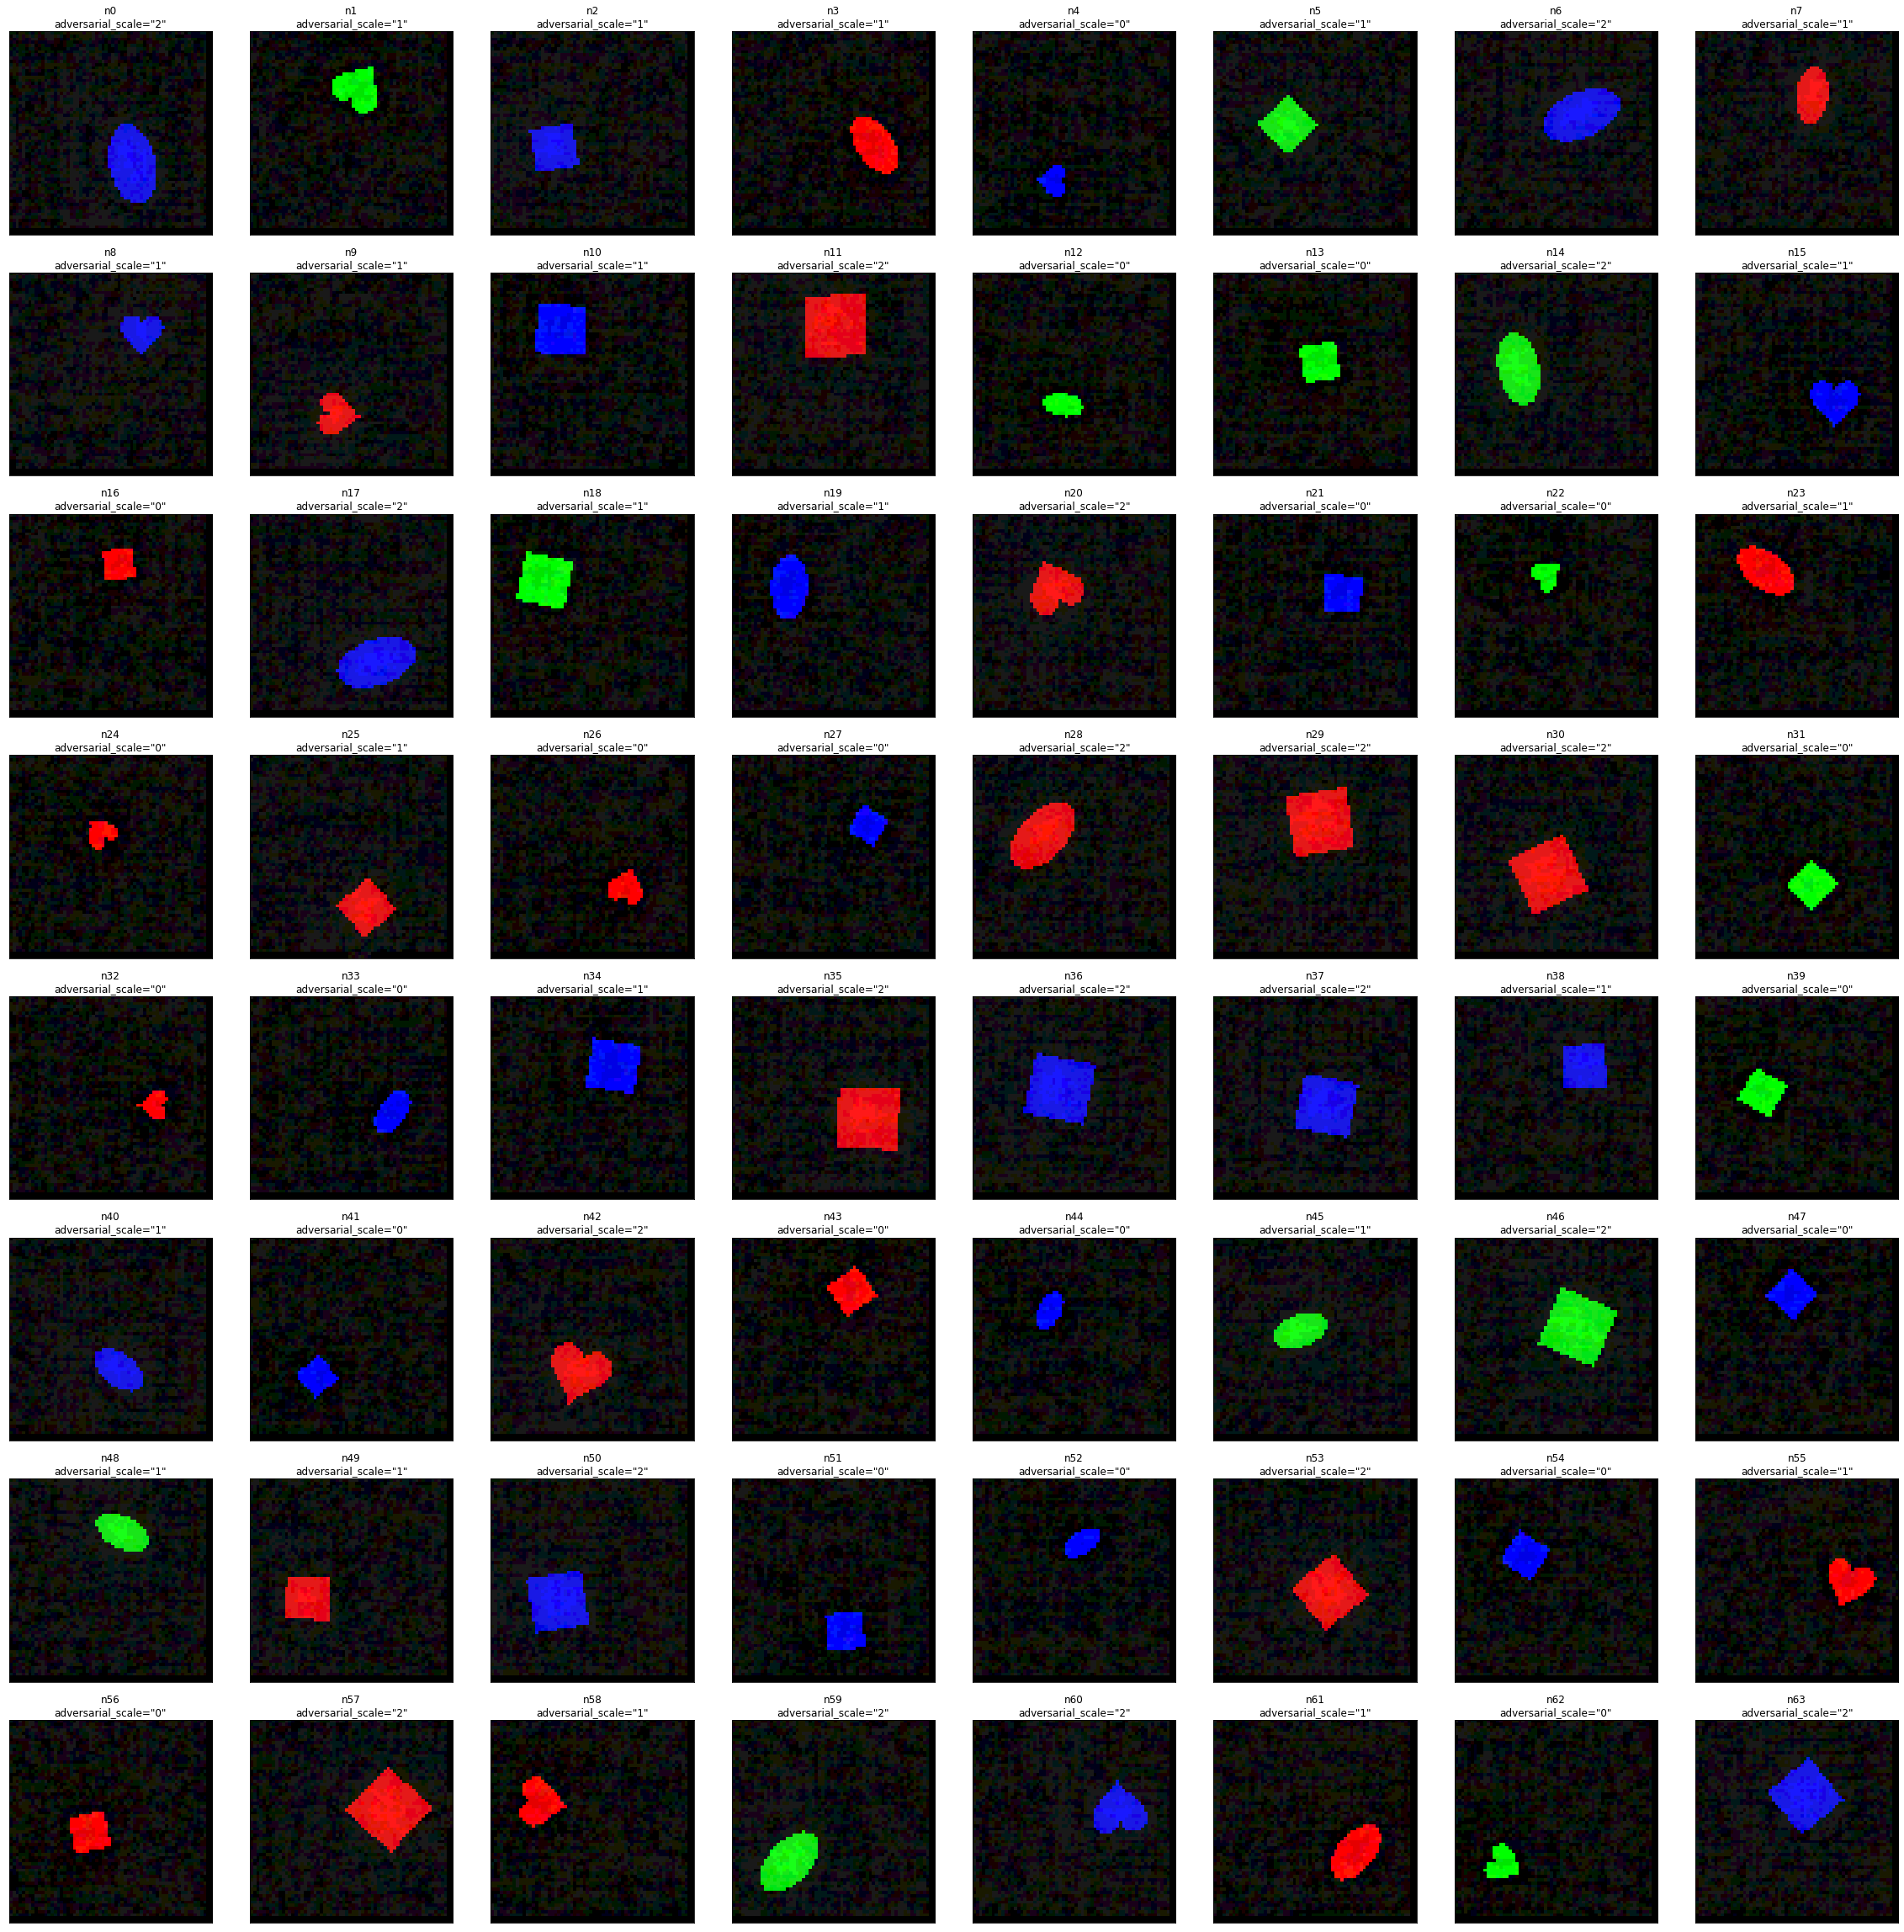

In [187]:
adv_test_dataloaders = prepare_adversarial_dataloader_maker(
    target_cue=GROUND_TRUTH_CUE
)(model_to_train)

# this loop is here because 
# adv_test_dataloaders = {"adversarial_dataloader_name": adversarial_dataloader}
for adversarial_dataloader_name, adversarial_dataloader \
    in adv_test_dataloaders.items():

    utils.show_dataloader_first_batch(
        adversarial_dataloader, 
        [adversarial_dataloader_name]
    )

Just like in the de-biasing task we can create an experiment function that uses default factories.  

In [188]:
def adversarial_exp(
    n_epochs,
    make_train_dataloader=datasets.prepare_default_dsprites_dataloaders_maker(
        one_dataloader_to_select=ADVERSARIALLY_ATTACKED_CUE
    ), 
    make_val_dataloaders=prepare_adversarial_dataloader_maker(
        split="test",
        dataset_size=TEST_DATASET_SIZE
    ), 
    make_test_dataloaders=datasets.prepare_default_dsprites_dataloaders_maker(
        is_multilabel=True,
        split="test",
        dataset_size=TEST_DATASET_SIZE
    ),
    make_model=models.prepare_resnet18_maker(), 
    make_criterion=train.make_ce_criterion, 
    do_train_func=train.do_default_train_func,
    make_optimizer=train.prepare_sgd_optimizer_maker(DEFAULT_START_LR),
    make_scheduler=train.prepare_exp_scheduler_maker(),
    make_metric=train.make_accuracy,
    random_seed=RANDOM_SEED,
    stop_after_epoch=None
):
    experiments.generic_experiment(
        n_epochs=n_epochs,
        make_train_dataloader=make_train_dataloader,
        make_val_dataloaders=make_val_dataloaders,
        make_test_dataloaders=make_test_dataloaders,
        make_model=make_model,
        make_metric=make_metric,
        make_criterion=make_criterion, 
        make_optimizer=make_optimizer,
        make_scheduler=make_scheduler,
        do_train_func=do_train_func,
        random_seed=random_seed,
        stop_after_epoch=stop_after_epoch
    )

Let's run a default adversarial experiment:

Epoch 20/20 train mean stats:
    loss: 0.0009531540674764948
    Accuracy: 1.0


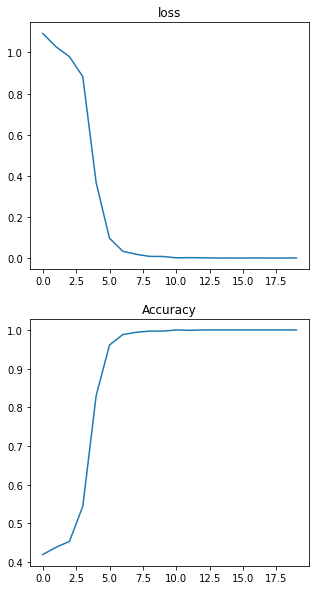

                                             
Epoch 20/20 val adversarial_shape mean stats:
    Accuracy: 0.254


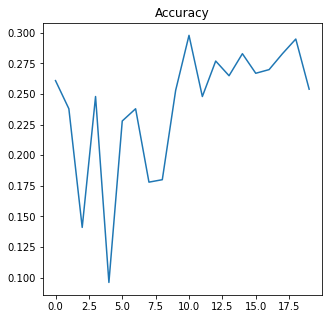

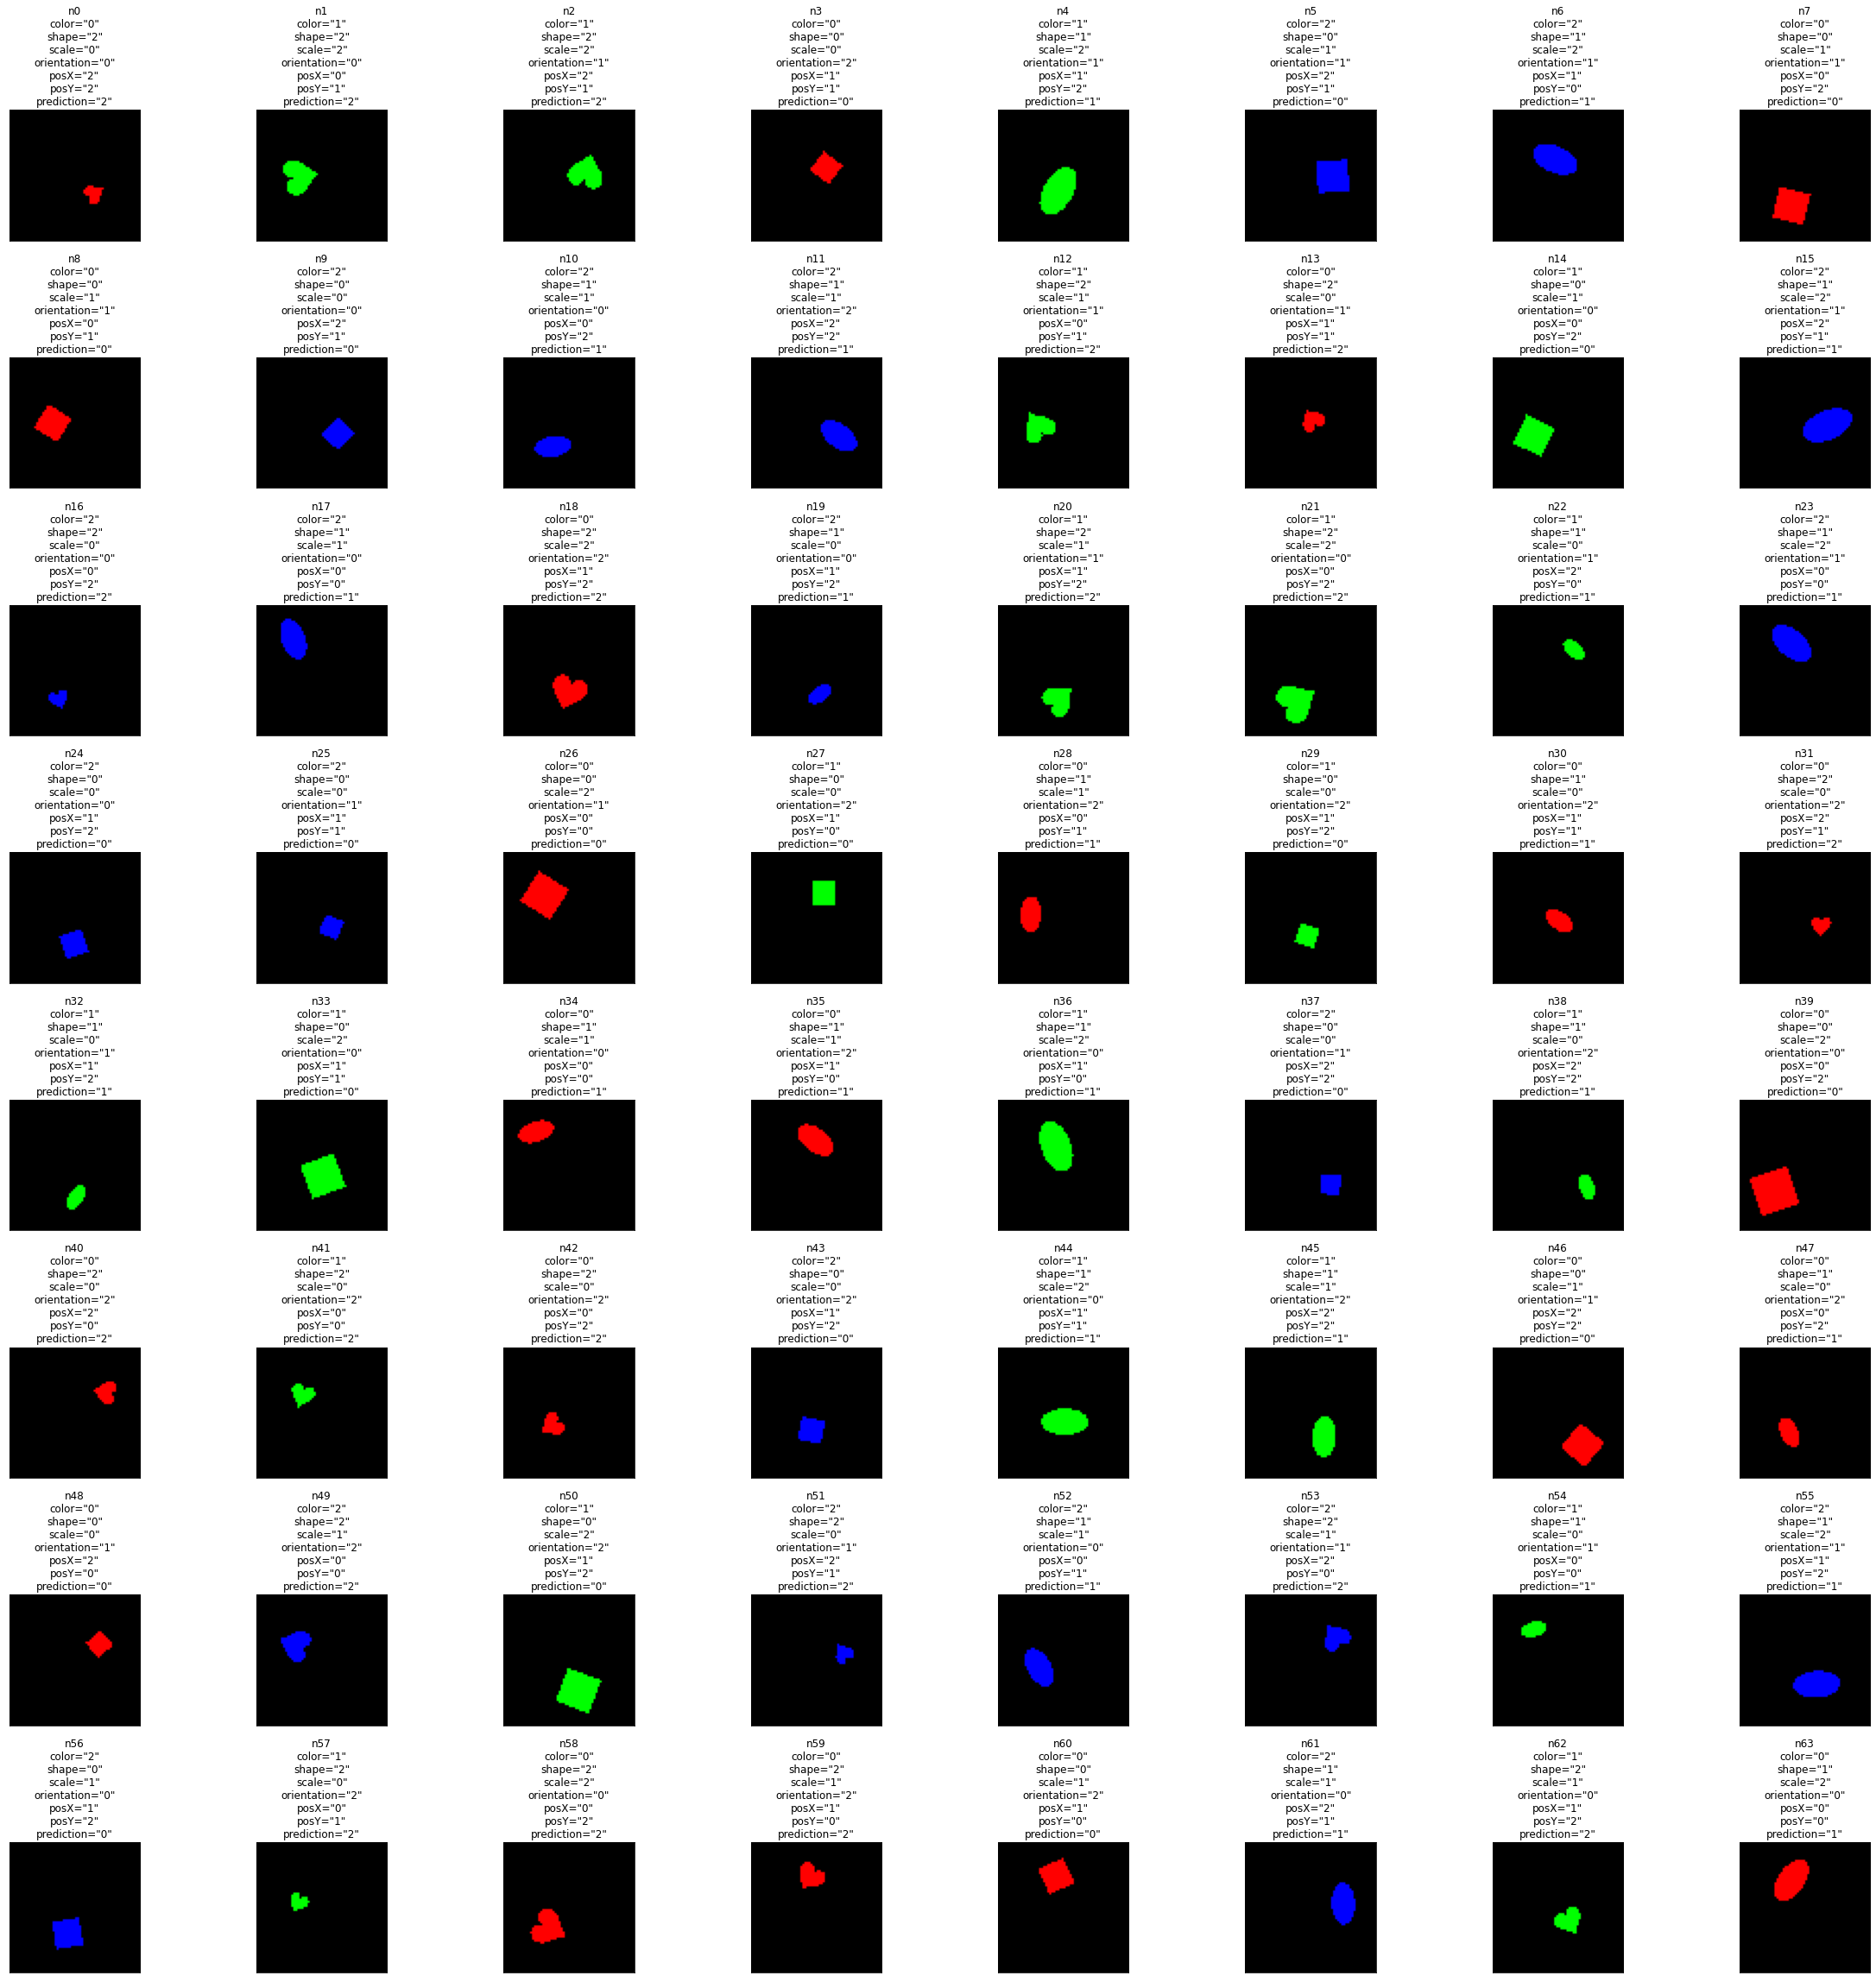

                            
Test on all_cues Accuracy for color: 0.336
Test on all_cues Accuracy for shape: 1.0
Test on all_cues Accuracy for scale: 0.333
Test on all_cues Accuracy for orientation: 0.331
Test on all_cues Accuracy for posX: 0.333
Test on all_cues Accuracy for posY: 0.331


In [173]:
adversarial_exp(
    n_epochs=20,
    make_optimizer=train.prepare_sgd_optimizer_maker(start_lr=0.005),
)

Adversarial accuracy for "ADVERSARIALLY_ATTACKED_CUE" on validation dataset is lower than random guess accuracy. We can try to increase it by performing adversarial training.  

To achieve this we need the following:

- adversarial criterion,
- do_adversarial_train_func.

Let's start with the adversarial criterion. It needs to compute adversarial input and use it for the computation of an adversarial loss.

### Compute adversarial loss in method "CriterionForAdversarialAttack.\_\_call\_\_" **(5 points)**:

In [189]:
class CriterionForAdversarialAttack:

    def __init__(
        self, 
        attack: Callable,
        alpha: float,
        criterion: Callable
    ):
        """
        Initialize criterion for adversarial training.

        Args:
            attack (Callable): same as 
                for "AdversarialAttackDataloaderWrapper.__init__" method.
                Stored in "self.attack".

            alpha (float): an argument that will be used 
                by function "do_adversarial_train".
                Stored in "self.alpha".

            criterion (Callable): a function used for computing loss 
                for images and labels, or adversarial images 
                and the same labels in method "__call__" of this class.
                Stored in "self.criterion".
        """
        self.attack = attack
        self.alpha = alpha
        self.criterion = criterion

    def __call__(self, model, images, label):
        images.requires_grad_(True)
        preds = model(images)
        target_loss = self.criterion(preds, label)

        adversarial_loss = self.compute_adversarial_loss(
            model, 
            images, 
            label, 
            preds
        )

        return preds, target_loss, adversarial_loss, self.alpha

    def compute_adversarial_loss(
        self, 
        model: nn.Module, 
        images: torch.Tensor, 
        labels: torch.Tensor, 
        preds: torch.Tensor
    ) -> torch.Tensor:
        """
        Compute an adversarial loss as L(adv_images, labels).
        Where "adv_images" are images attacked 
        by the "self.attack" (adversarial images),
        "labels" are labels for this images 
        (they are the same as for the unattacked images) 
        and "L" is "self.criterion".

        Args:
            self.*: see "__init__" method of this class.

            model (torch.nn.Module): a model 
                used to compute predictions for adversarial images.

            images (torch.Tensor): input images that are attacked.

            labels (torch.Tensor): labels for the <images> as well as 
                for the "adv_images".

            preds (torch.Tensor): outputs of the <model> 
                after <images> are forwarded through it. 
                They are already computed because they were used 
                for the "target_loss" computation.

                Where "target_loss" is an argument 
                for nested function "do_optimizer_step"
                inside function "do_adversarial_train".

        Returns:
            adversarial_loss (torch.Tensor): cameo
        """
        ######### ATTENTION PLEASE
        adv_images = self.attack(
            images=images,
            labels=labels,
            outputs=preds,
            retain_graph=True
        )

        adv_preds = model(adv_images)

        adversarial_loss = self.criterion(adv_preds, labels)
        ######### THANK YOU FOR YOUR ATTENTION

        return adversarial_loss


def prepare_criterion_for_adversarial_attack_maker(
    attack, 
    alpha,
    criterion
):
    def make_criterion_for_adversarial_attack():
        return CriterionForAdversarialAttack(
            attack, 
            alpha,
            criterion
        )

    return make_criterion_for_adversarial_attack

Speaking about "do_adversarial_train", it should be similar to [do_default_train](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L498-L563) with modifications to the way the final loss is computed.

### Compute final loss using outputs of the "CriterionForAdversarialAttack" and update model's weights **(5 points)**:

In [191]:
def do_adversarial_train(
    model, 
    criterion, 
    optimizer, 
    images, 
    labels, 
    second_labels,  # needed for compatibility with de-biasing exp
    epoch_histories
):
    def do_optimizer_step(
        alpha: float, 
        target_loss: torch.Tensor, 
        adversarial_loss: torch.Tensor, 
        optimizer: object
    ) -> None:
        """
        Compute the final loss as described in paper 
        "EXPLAINING AND HARNESSING ADVERSARIAL EXAMPLES"
        [https://arxiv.org/pdf/1412.6572.pdf].
        Use its gradients to update the <model>'s weigths.

        Args:
            alpha (float): a weight for combining losses.

            target_loss (torch.Tensor): a loss for the original task, 
                i.e. in the absence of any adversarial attacks.

            adversarial_loss (torch.Tensor): a loss computed 
                by method "compute_adversarial_loss" 
                of class "CriterionForAdversarialAttack".

            optimizer (optimizer class): an optimizer 
                that updates model's weights.
        """
        ######### ATTENTION PLEASE
        loss = alpha * target_loss + (1 - alpha) * adversarial_loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ######### THANK YOU FOR YOUR ATTENTION

    assert isinstance(criterion, CriterionForAdversarialAttack)

    pred, target_loss, adversarial_loss, alpha = criterion(
        model, 
        images, 
        labels
    )

    do_optimizer_step(alpha, target_loss, adversarial_loss, optimizer)

    utils.append_to_list_in_dict(
        epoch_histories, 
        "target_loss", 
        target_loss.item()
    )
    utils.append_to_list_in_dict(
        epoch_histories, 
        "adversarial_loss", 
        adversarial_loss.item()
    )

    return pred, epoch_histories

Let's run an experiment using adversarial training (we use an ADAM optimizer just like in WeightedCrossEntropy exercise for the de-biasing task):

Epoch 20/20 train mean stats:
    target_loss: 0.0002399164339457378
    adversarial_loss: 0.0032036715847381927
    Accuracy: 1.0


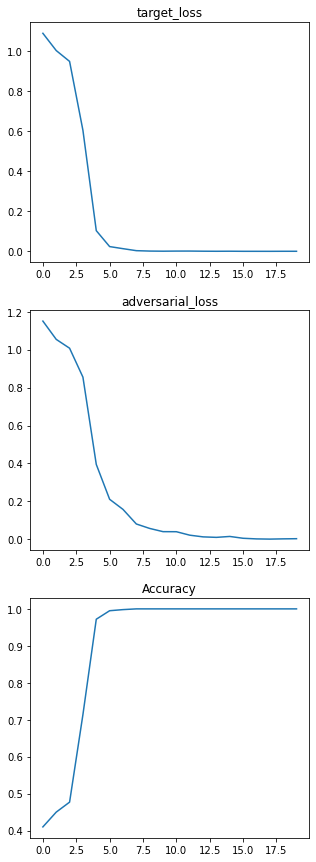

                                             
Epoch 20/20 val adversarial_shape mean stats:
    Accuracy: 0.863


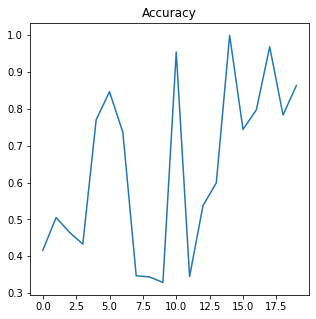

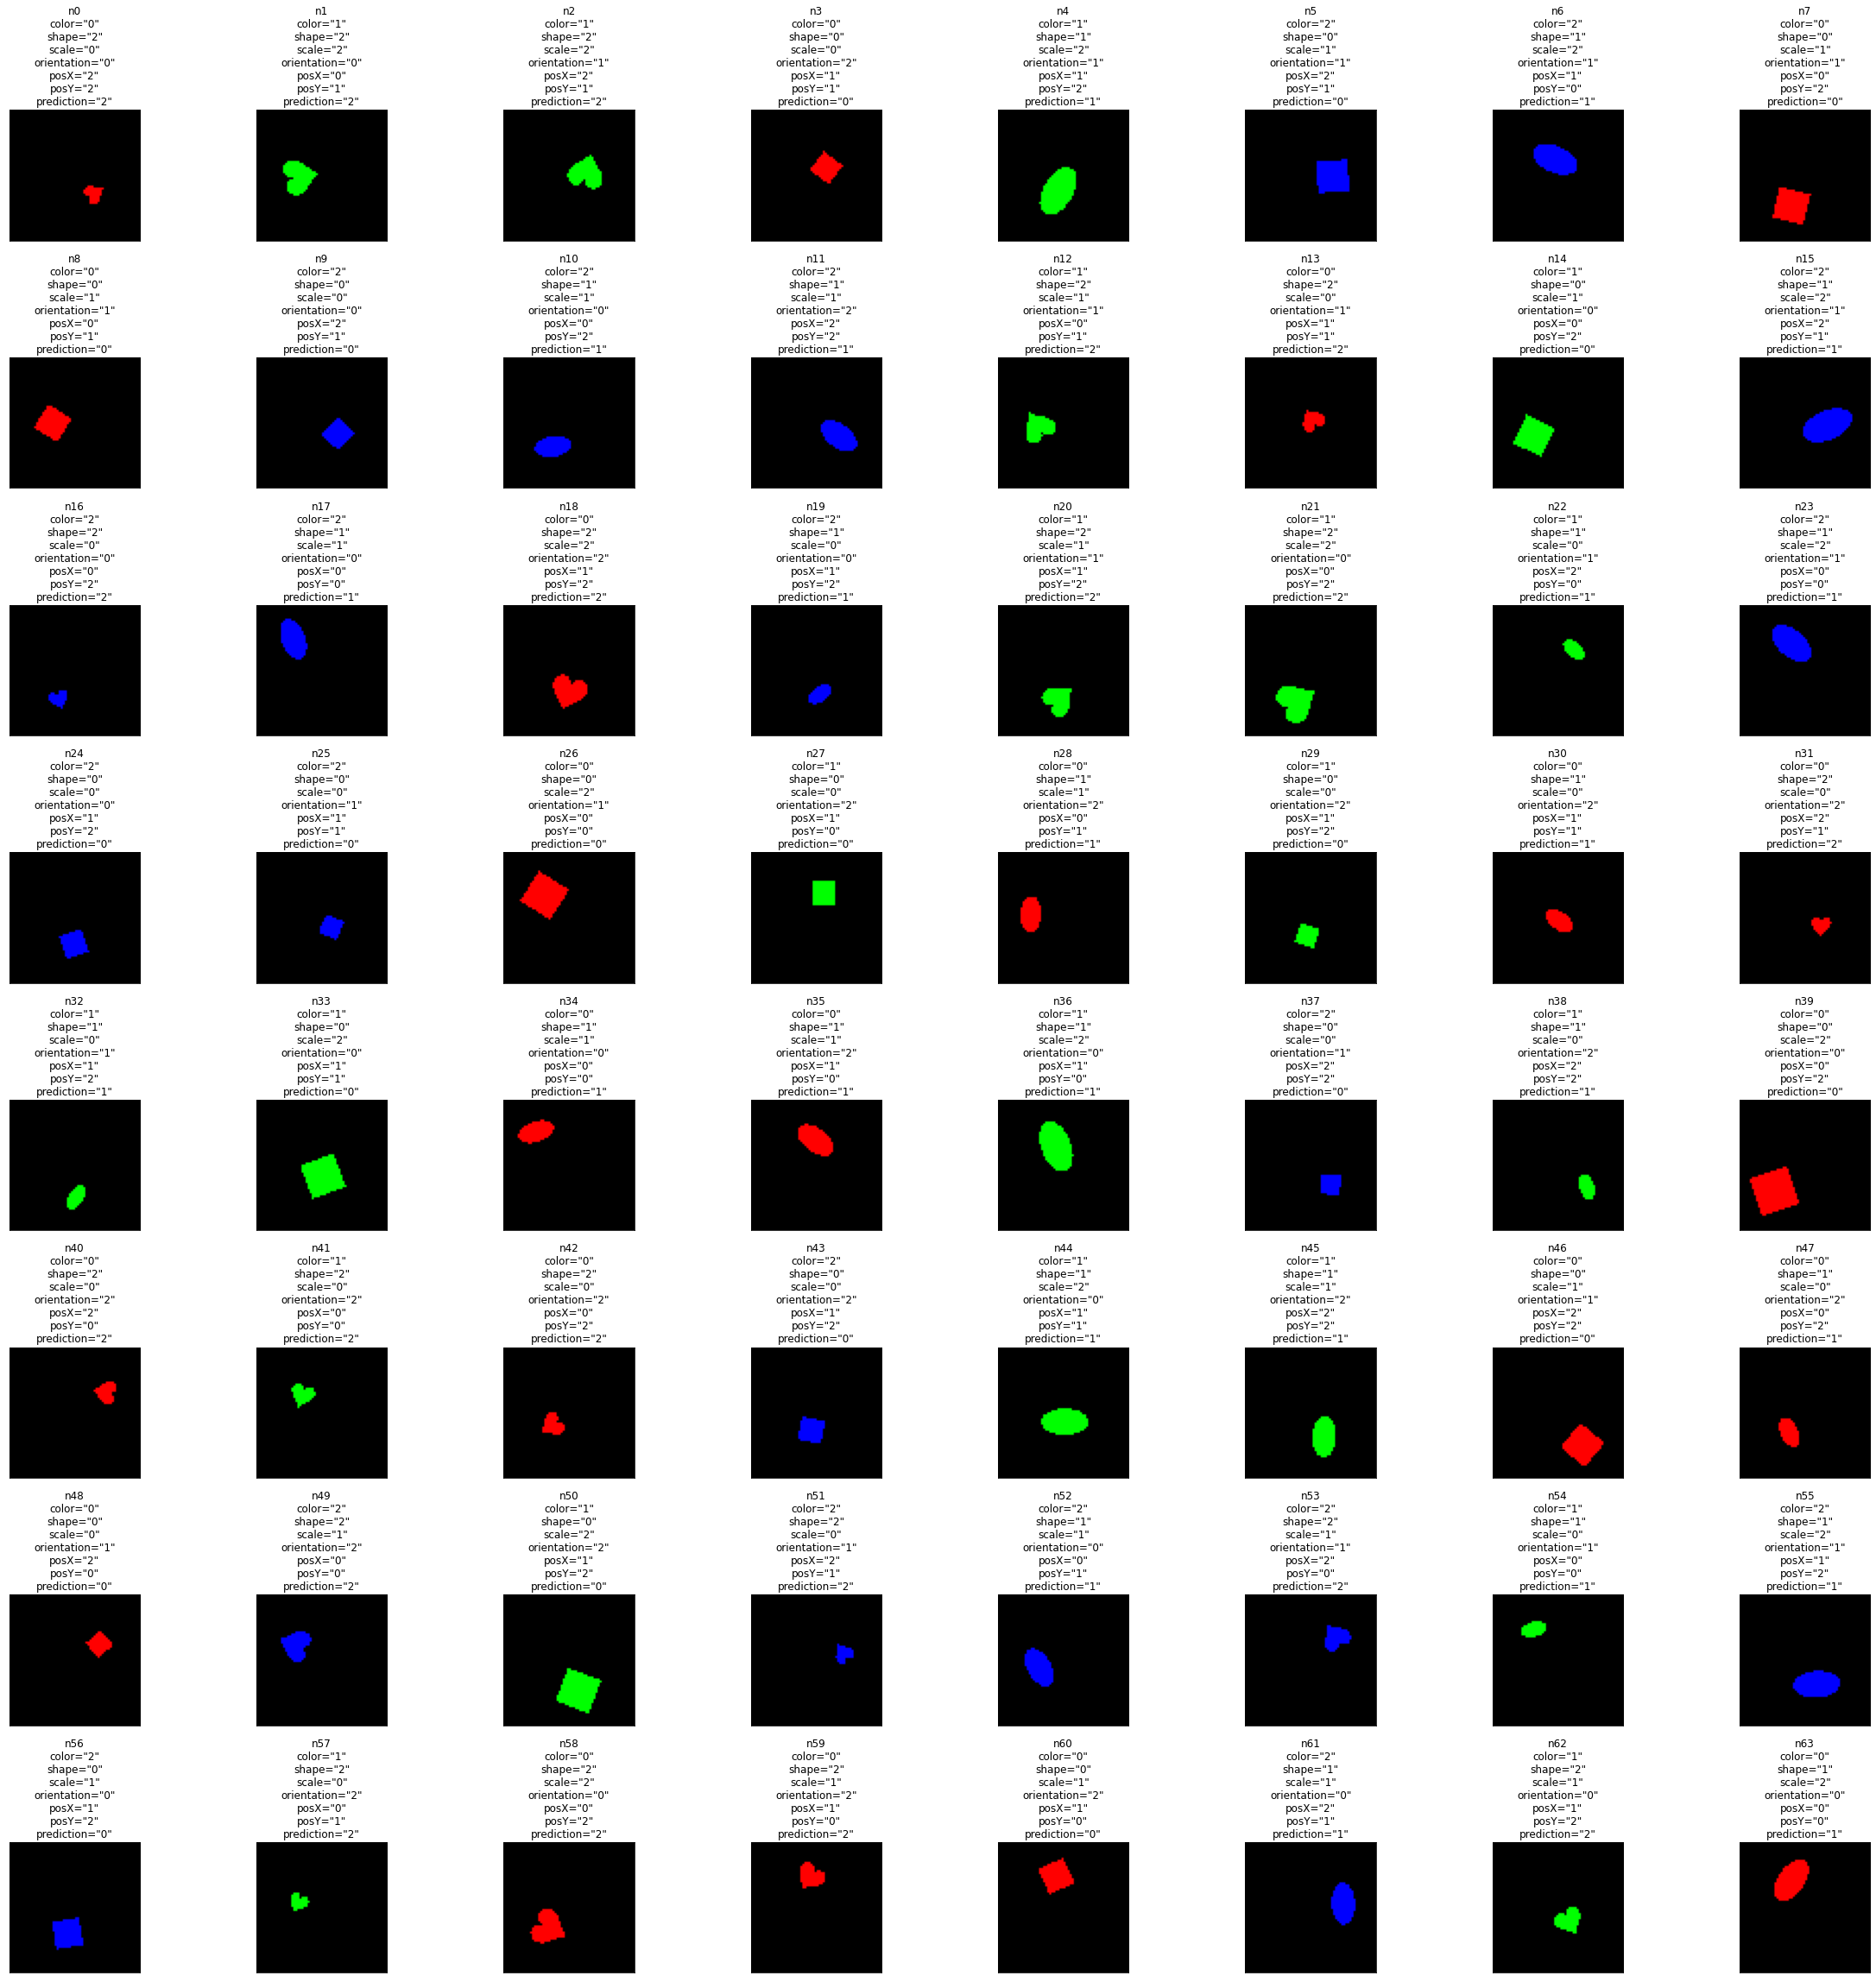

                            
Test on all_cues Accuracy for color: 0.336
Test on all_cues Accuracy for shape: 1.0
Test on all_cues Accuracy for scale: 0.333
Test on all_cues Accuracy for orientation: 0.331
Test on all_cues Accuracy for posX: 0.333
Test on all_cues Accuracy for posY: 0.331


In [192]:
adversarial_exp(
    n_epochs=20,
    make_criterion=prepare_criterion_for_adversarial_attack_maker(
        attack=AttackFGSM(eps=FGSM_EPS, criterion=train.make_ce_criterion()), 
        alpha=FGSM_ALPHA,
        criterion=train.make_ce_criterion()
    ),
    do_train_func=do_adversarial_train,
    make_optimizer=train.prepare_adam_optimizer_maker(start_lr=0.005)
)


### Report **(7 points)**

Which pros and cons has adversarial training with respect to vanilla training? 

For answering this question, consider the following aspects:
- Clean and adversarial accuracy.
- Computational complexity.
- Can you guarantee your safety against arbitrary adversarial attacks after performing adversarial training?

The model above manages to keep 100% **clean accuracy**. It also becomes much more robust against adversarial samples, reaching 86.3% **adversarial accuracy** on the validation set. Vanilla training also reached 100% clean aaccuracy, but its adversarial accuracy was worse than random guessing - it was not robust against adversarial attacks at all.

Note: As learned in the lecture, usually adversarial robustness comes at a price of performing worse on clean samples than vanilla training. This trade-off can not be observed here, as the problem is fairly easy.

Adversarial training has a larger **computational complexity**: during training it has to perform one forward pass on the clean image, one backward pass on the clean image (and update to obtain the adversarial image), one forward pass on the adversarial image and one backward pass on the combined adversarial and target losses. One also has to take into consideration that a forward and backward pass and a gradient update is also needed for the validation samples as well, as we measure validation accuracy on adversarial samples. For the vanilla network we simply have to compute one forward and backward pass during training. (In our case we also need to perform a forward and backward pass with respect to the images in order to construct adversarial samples for validation, but one would not do this in practice if they did not train to be robust to adversarial attacks.)

That's it! Good job!